In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# local packages import
from src.data_utils import remove_outliers_iqr
from src.plot_utils import plot_bar_chart, plot_line_chart, plot_heatmap, plot_histogram

%matplotlib inline

## Benin Malanville

### Benin Malanville - Summary Statistics and Data Cleaning

In [151]:
benin_df = pd.read_csv('../data/raw/benin-malanville.csv')
benin_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [152]:
benin_df.drop(benin_df[(benin_df['GHI'] <= 0) | (benin_df['DNI'] <= 0) | (benin_df['DHI'] <= 0)].index, inplace=True)
benin_df.drop('Comments', axis=1, inplace=True)
benin_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
414,2021-08-09 06:55,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8
415,2021-08-09 06:56,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9
416,2021-08-09 06:57,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9
417,2021-08-09 06:58,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0
418,2021-08-09 06:59,23.9,1.9,23.5,22.2,22.4,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525135,2022-08-08 16:16,5.3,0.1,5.3,6.6,6.5,22.0,99.1,4.6,5.9,0.8,129.8,15.0,995,0,0.2,22.8,22.1
525142,2022-08-08 16:23,4.6,0.2,4.6,5.9,5.8,21.9,99.0,6.5,9.2,1.2,126.3,12.3,995,0,0.2,22.8,22.0
525144,2022-08-08 16:25,4.4,0.1,4.4,5.7,5.6,21.9,99.0,6.9,8.2,0.9,137.2,6.5,995,0,0.1,22.7,22.0
525152,2022-08-08 16:33,4.8,0.1,4.9,6.0,5.9,22.0,99.1,6.3,8.2,1.0,152.1,10.0,995,0,0.1,22.7,22.0


In [153]:
benin_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000,243062.000000
mean,520.693187,362.077131,250.508777,508.874273,492.272095,31.360798,44.994491,2.812171,3.735319,0.588938,160.396042,11.988136,994.113572,0.001979,0.000516,47.710092,42.476998
std,301.435252,278.301166,142.198416,304.822995,295.595402,5.428394,26.715292,1.534224,1.889419,0.248478,95.485100,6.246090,2.634485,0.044441,0.025398,12.318939,10.475104
min,0.300000,0.100000,0.300000,0.200000,0.200000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.600000,8.400000
25%,250.900000,72.200000,144.800000,230.300000,222.900000,27.900000,18.600000,1.700000,2.400000,0.400000,76.500000,8.600000,992.000000,0.000000,0.000000,39.200000,35.300000
50%,529.100000,360.900000,230.300000,511.400000,494.000000,31.600000,43.900000,2.700000,3.600000,0.600000,160.800000,11.500000,994.000000,0.000000,0.000000,48.200000,42.600000
75%,793.600000,608.800000,338.700000,790.200000,761.200000,35.500000,67.400000,3.800000,4.900000,0.700000,241.000000,14.800000,996.000000,0.000000,0.000000,56.700000,49.700000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,16.000000,22.300000,3.400000,360.000000,99.400000,1003.000000,1.000000,2.400000,81.000000,72.500000


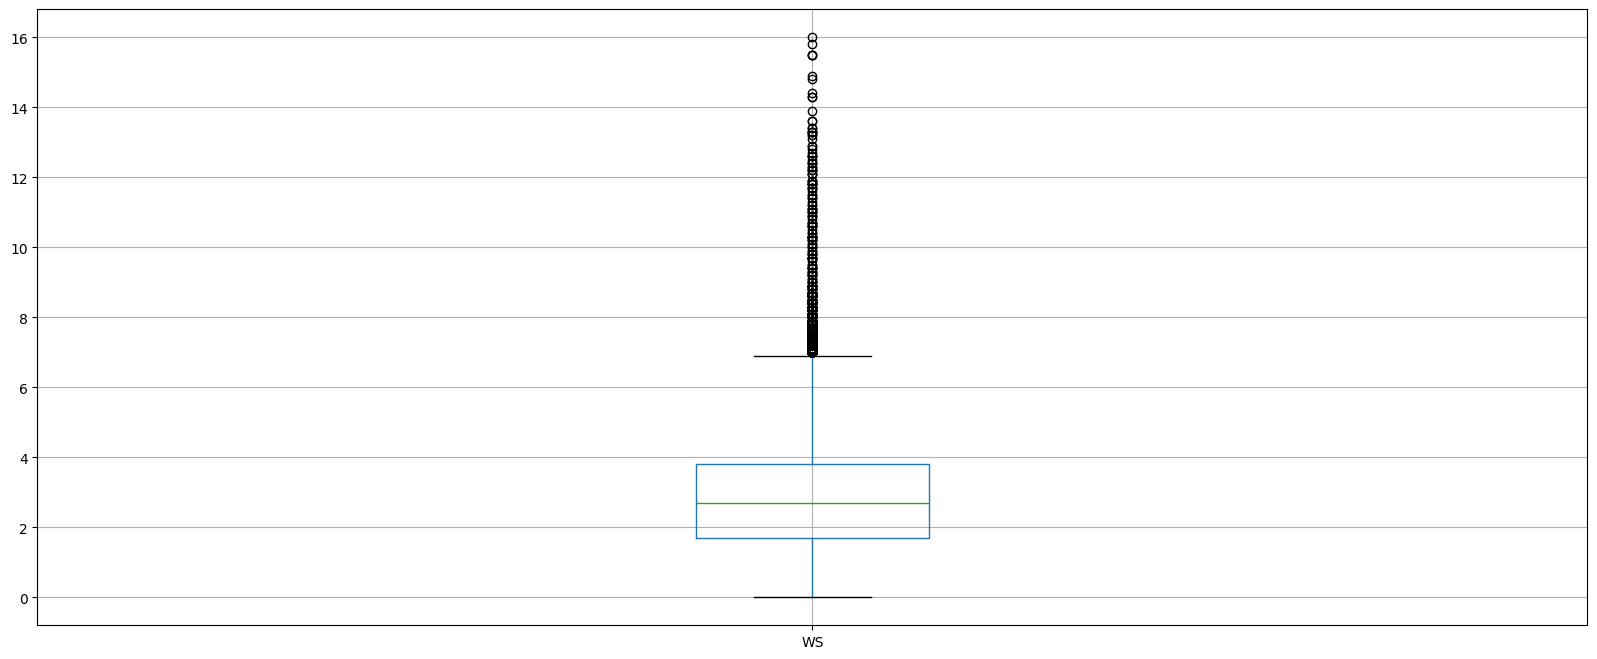

In [154]:
benin_df.boxplot('WS', figsize=(20, 8))
plt.show()

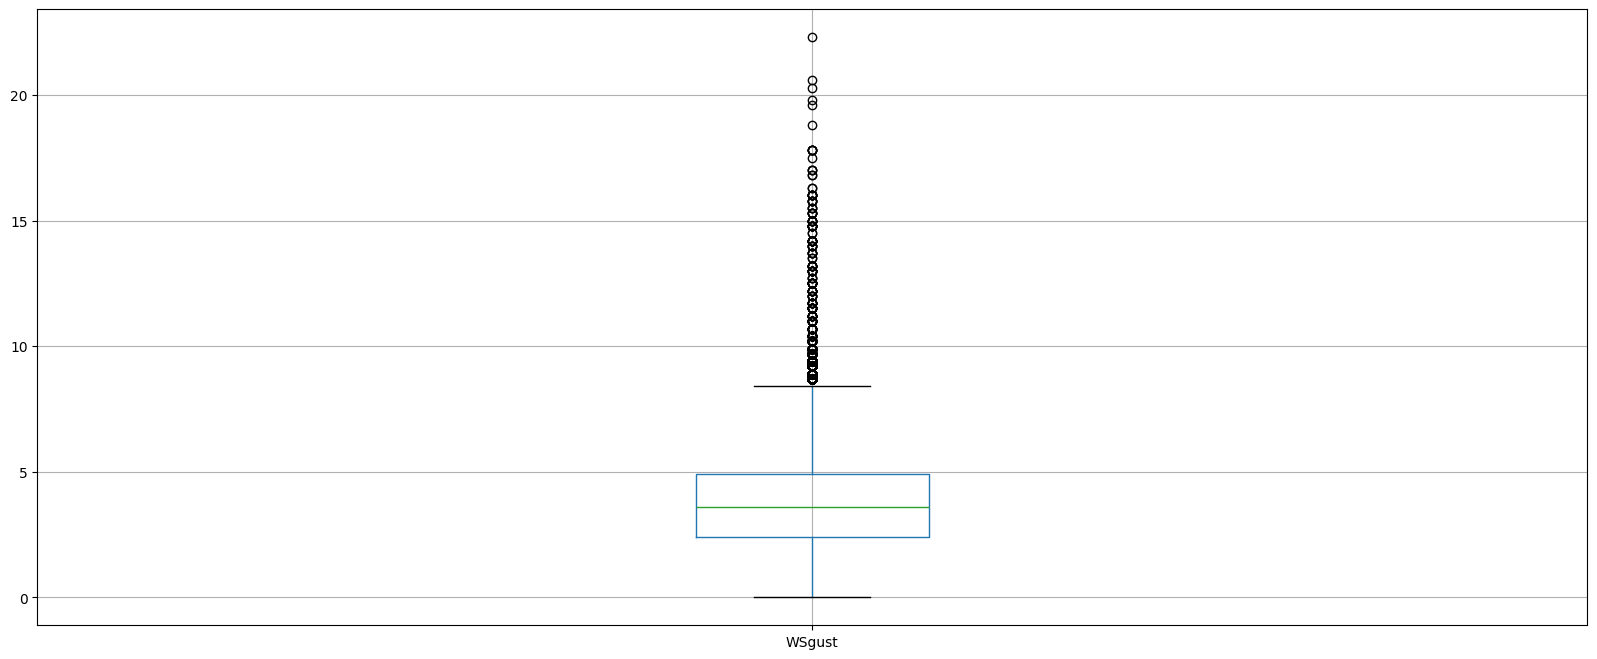

In [155]:
benin_df.boxplot('WSgust', figsize=(20, 8))
plt.show()

In [156]:
# remove outliers from the WS and WSgust
benin_df = remove_outliers_iqr(benin_df, 'WS')
benin_df = remove_outliers_iqr(benin_df, 'WSgust')

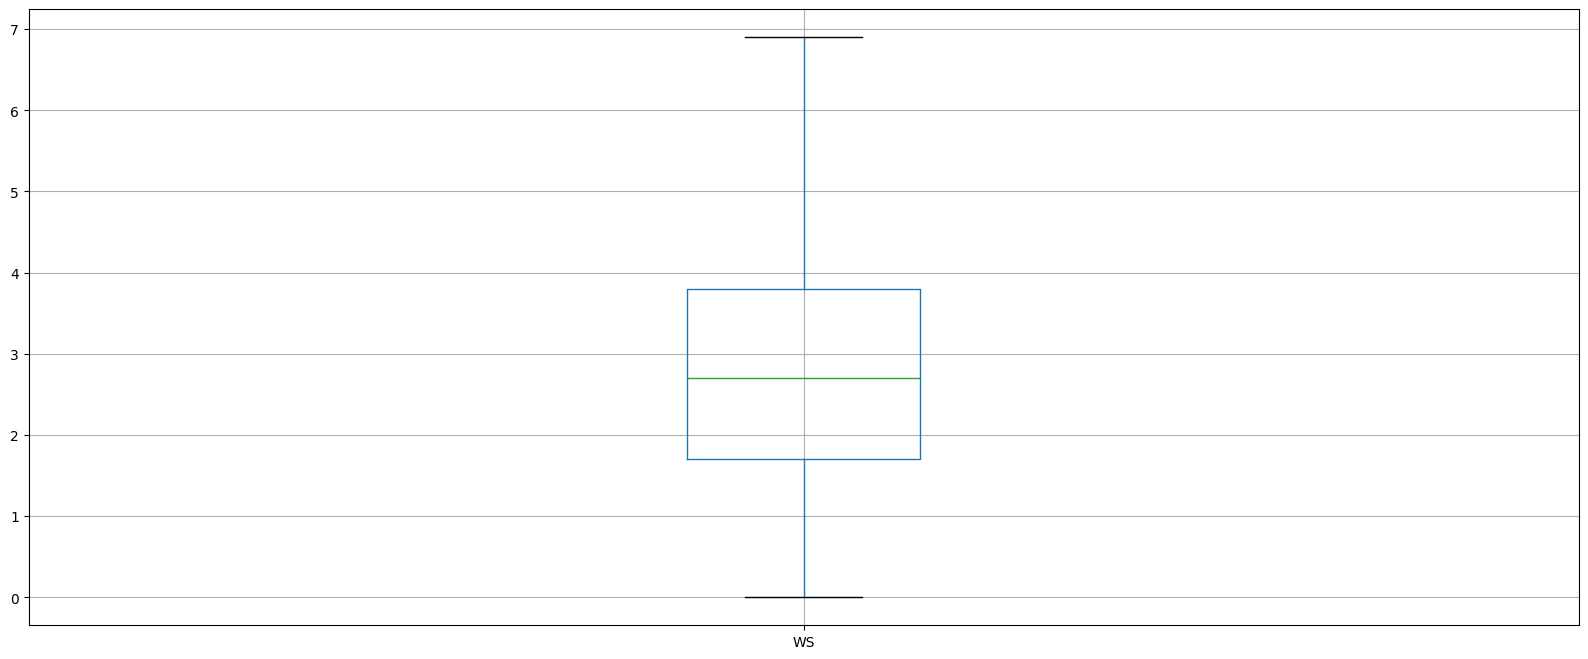

In [157]:
benin_df.boxplot('WS', figsize=(20, 8))
plt.show()

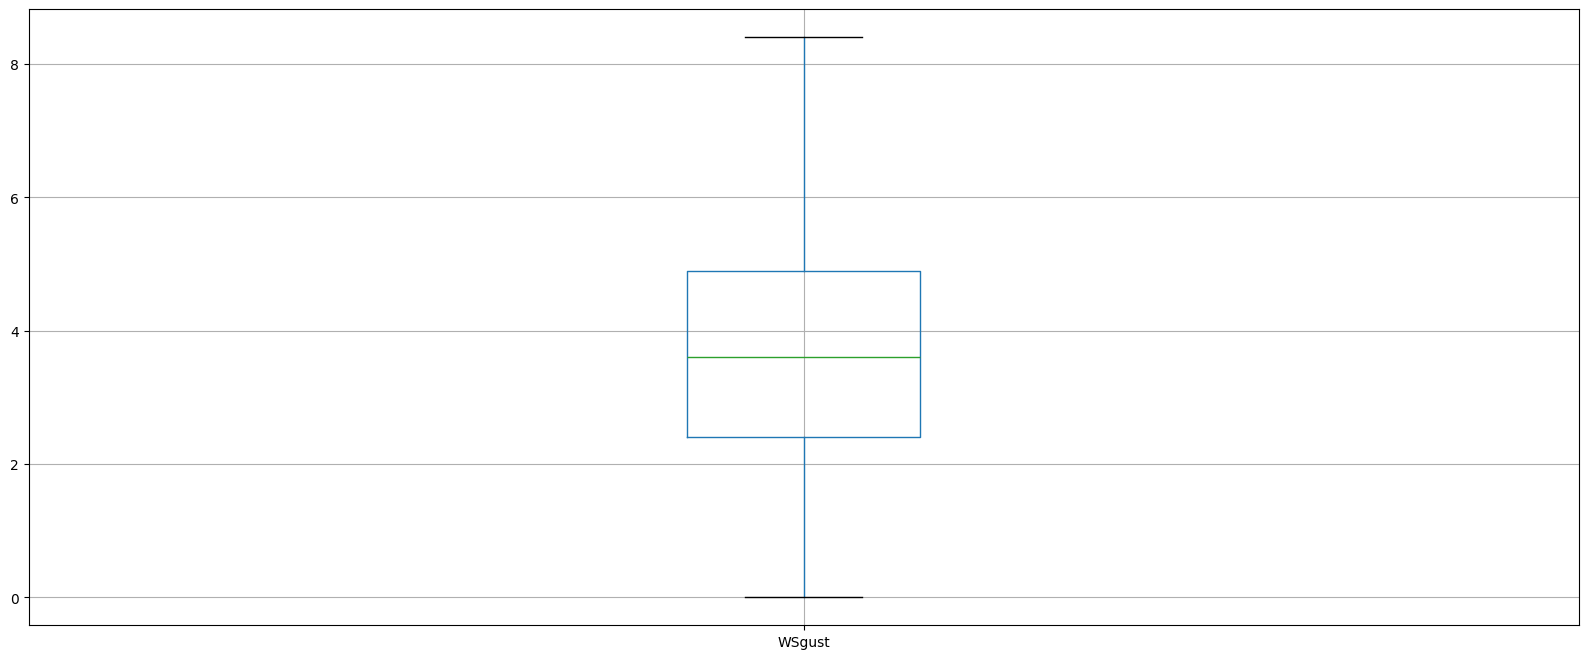

In [158]:
benin_df.boxplot('WSgust', figsize=(20, 8))
plt.show()

In [159]:
benin_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000,240898.000000
mean,519.983997,361.381955,250.430102,507.899591,491.517827,31.382918,45.088725,2.772653,3.684024,0.583092,160.655843,11.991665,994.095123,0.001988,0.000153,47.743329,42.528939
std,301.425280,277.951847,142.134002,304.631560,295.574578,5.427129,26.691365,1.478010,1.812956,0.239641,95.620678,6.264191,2.622947,0.044547,0.009455,12.331910,10.478369
min,0.800000,0.100000,0.300000,0.200000,0.200000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.600000,8.400000
25%,250.300000,72.000000,144.600000,229.500000,222.300000,27.900000,18.700000,1.700000,2.400000,0.400000,76.400000,8.600000,992.000000,0.000000,0.000000,39.200000,35.400000
50%,527.400000,360.100000,230.300000,509.300000,492.000000,31.600000,44.100000,2.700000,3.600000,0.600000,162.100000,11.500000,994.000000,0.000000,0.000000,48.200000,42.700000
75%,793.200000,607.400000,338.500000,789.100000,760.500000,35.500000,67.500000,3.800000,4.900000,0.700000,241.200000,14.800000,996.000000,0.000000,0.000000,56.700000,49.800000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,6.900000,8.400000,2.300000,360.000000,99.400000,1003.000000,1.000000,1.700000,81.000000,72.500000


In [160]:
try:
    benin_df.to_csv('../data/clean/benin_clean.csv')
except Exception as e:
    print(f'An error has occurred while trying to save to csv file')

### Benin Malanville - Timeseries Analysis

In [161]:
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
benin_df['Timestamp'].dtype

dtype('<M8[ns]')

In [162]:
benin_df['Month'] = benin_df['Timestamp'].dt.month
benin_df['Month'].dtype

dtype('int32')

In [163]:
benin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240898 entries, 414 to 525166
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      240898 non-null  datetime64[ns]
 1   GHI            240898 non-null  float64       
 2   DNI            240898 non-null  float64       
 3   DHI            240898 non-null  float64       
 4   ModA           240898 non-null  float64       
 5   ModB           240898 non-null  float64       
 6   Tamb           240898 non-null  float64       
 7   RH             240898 non-null  float64       
 8   WS             240898 non-null  float64       
 9   WSgust         240898 non-null  float64       
 10  WSstdev        240898 non-null  float64       
 11  WD             240898 non-null  float64       
 12  WDstdev        240898 non-null  float64       
 13  BP             240898 non-null  int64         
 14  Cleaning       240898 non-null  int64         
 15  Pre

In [164]:
monthly_average_benin_df = benin_df.groupby('Month').mean()
monthly_average_benin_df.head(20)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Month,,,,,,,,,,,,,,,,,,
1,2022-01-16 12:18:50.628981760,513.734978,483.791162,189.598640,556.314546,522.381924,27.162468,19.745965,3.573688,4.662484,0.664754,77.562979,12.163945,996.573718,0.001820,0.000000,40.896572,34.935666
2,2022-02-15 03:07:42.470209280,566.760360,395.060478,272.002271,583.065185,540.358814,30.404949,14.687252,3.146049,4.101074,0.600236,78.489189,11.296296,994.712024,0.002147,0.000000,45.867155,38.378035
3,2022-03-16 09:40:55.214171392,545.064617,225.398684,355.984478,531.243990,486.225035,35.461409,16.198994,2.954799,3.903508,0.599505,126.832681,12.791063,991.422688,0.002202,0.000000,51.940938,44.639051
4,2022-04-16 03:05:46.372771072,563.557462,336.848399,283.794927,521.794552,507.867210,36.370047,35.316131,3.262171,4.380593,0.687410,206.459083,14.897670,990.787065,0.002118,0.000000,52.769446,47.932312
5,2022-05-16 15:13:52.249558016,542.960092,311.904233,287.548789,481.217876,473.655759,34.631372,47.267277,3.106339,4.148369,0.647537,212.508709,13.945072,993.489180,0.001959,0.000038,51.246501,46.570998
6,2022-06-15 22:44:03.031716864,495.593915,309.915342,251.166213,428.043987,424.427349,31.491557,60.460585,2.633325,3.519338,0.572547,208.108597,12.256659,994.163846,0.002382,0.000640,47.833891,43.503857
7,2022-07-16 05:31:50.083700224,475.308472,280.417437,256.770986,417.380691,414.377082,29.156113,73.484649,2.958372,3.890232,0.600044,223.186985,11.610262,995.272824,0.002032,0.000431,44.278093,40.254105
8,2021-11-23 17:21:14.692644608,444.879822,222.876600,270.029185,410.117450,409.337245,28.445411,76.593707,2.363455,3.197256,0.546292,209.668227,9.975653,995.090621,0.002467,0.000443,43.793536,39.958853
9,2021-09-16 03:07:09.154291200,497.467511,288.825324,270.675358,477.346339,477.696504,29.474071,72.891183,2.161133,2.915466,0.510203,194.424835,10.900047,995.025637,0.002032,0.000177,47.292142,43.257282


#### Benin Malanville - Bar Charts

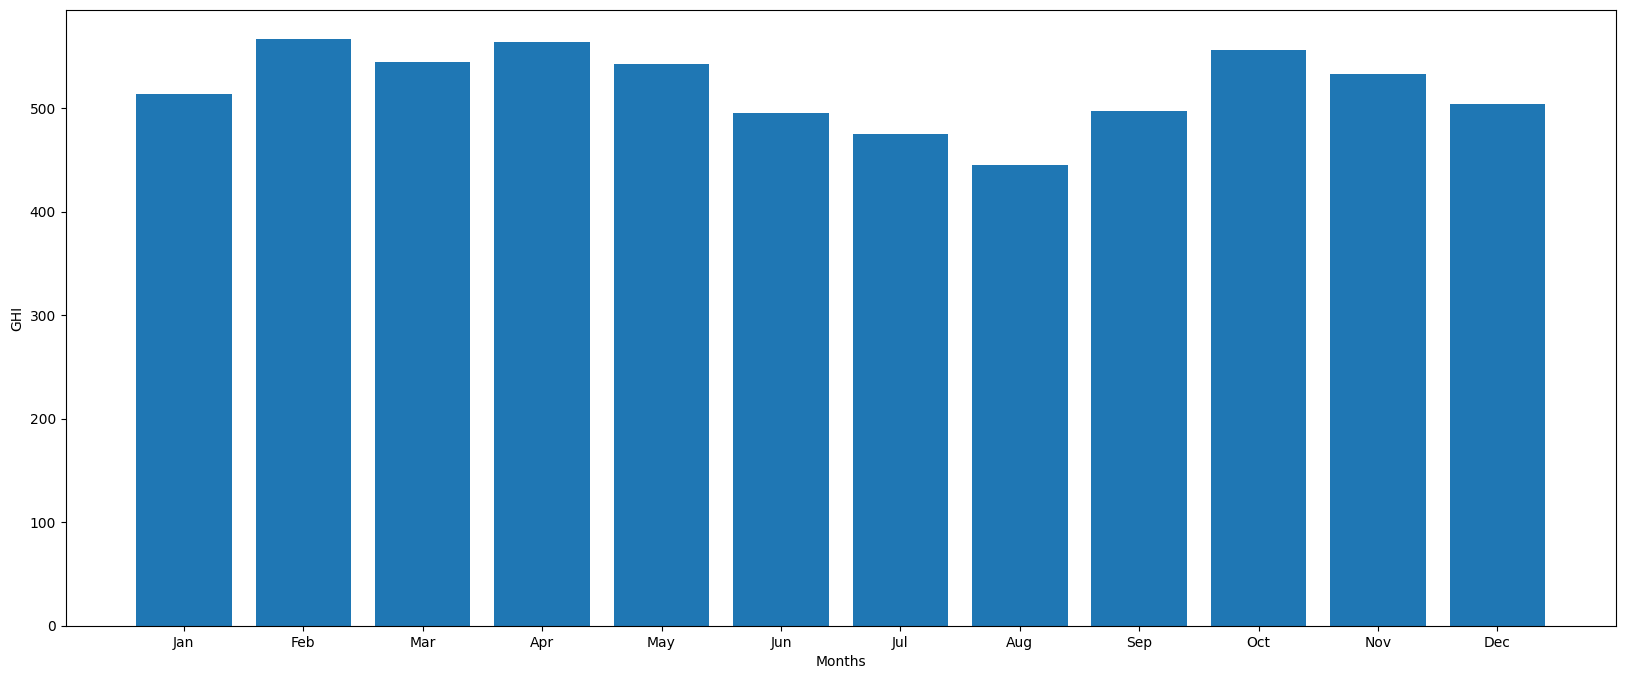

In [165]:
# plot bar chart for numeric columns
# plot the bar chart for the following numeric columns -> GHI, DNI, DHI, and Tamb
plot_bar_chart(monthly_average_benin_df, 'GHI')

plt.show()

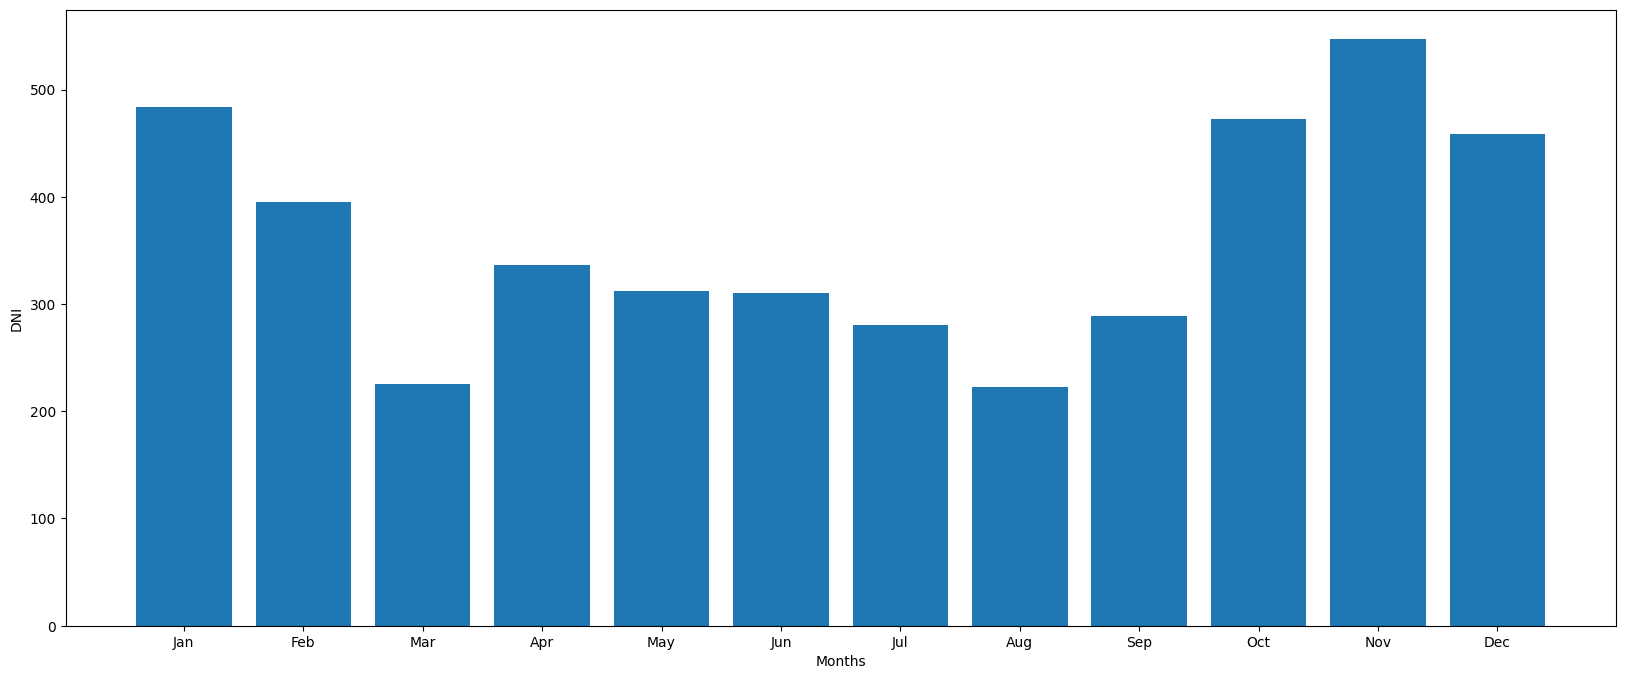

In [166]:
plot_bar_chart(monthly_average_benin_df, 'DNI')
plt.show()

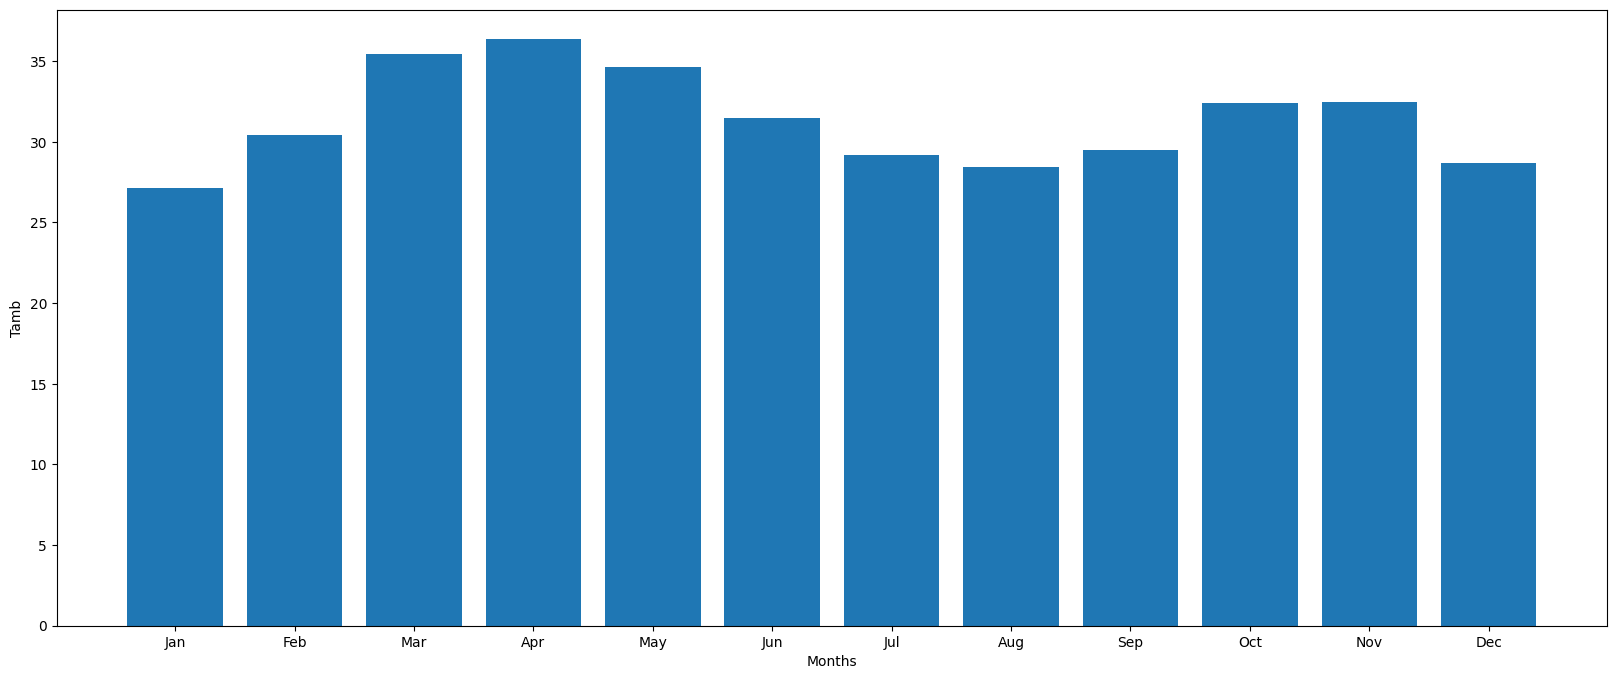

In [167]:
plot_bar_chart(monthly_average_benin_df, 'Tamb')
plt.show()

#### Benin Malanville - Line Charts

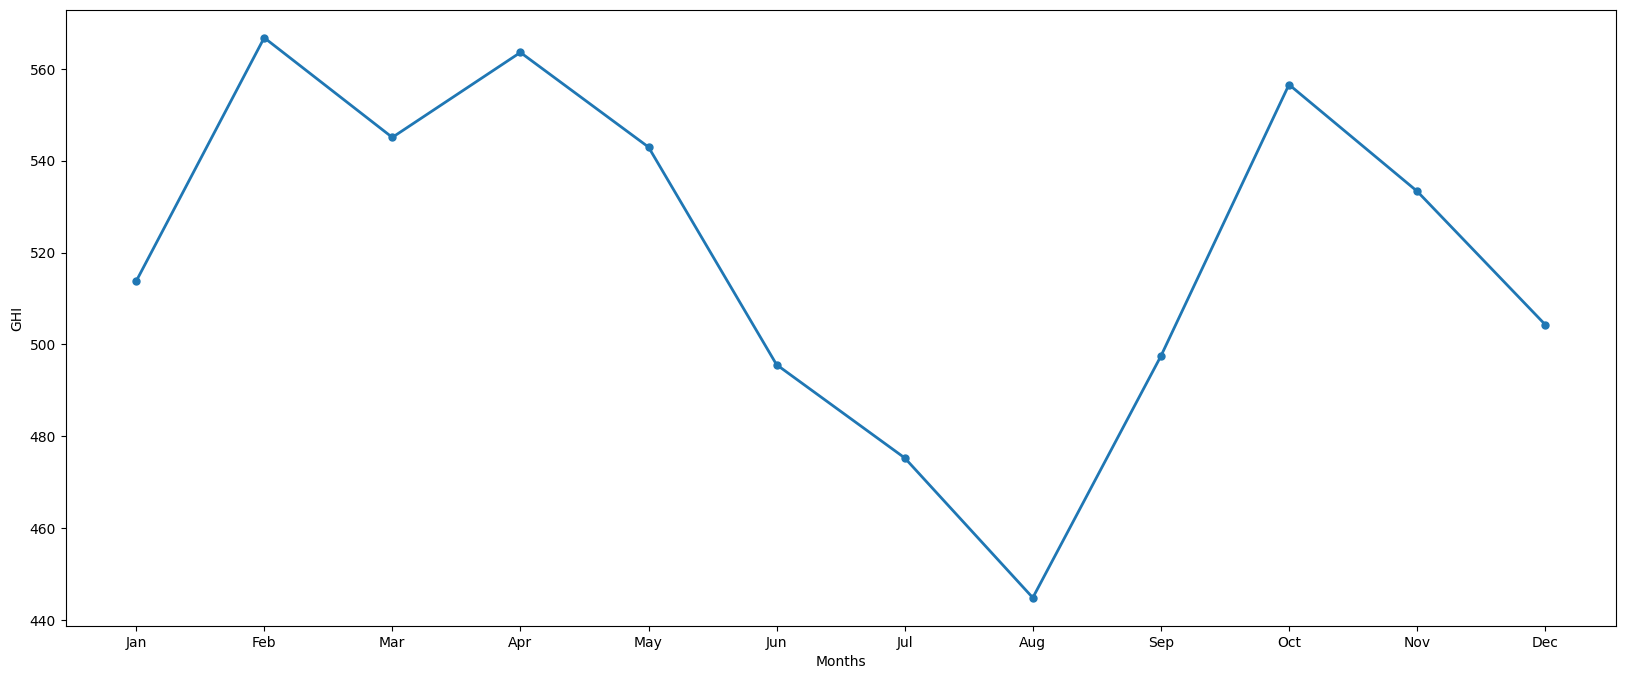

In [168]:
# plot line chart for numeric columns
# plot the bar chart for the following numeric columns -> GHI, DNI, DHI, and Tamb
plot_line_chart(monthly_average_benin_df, 'GHI')

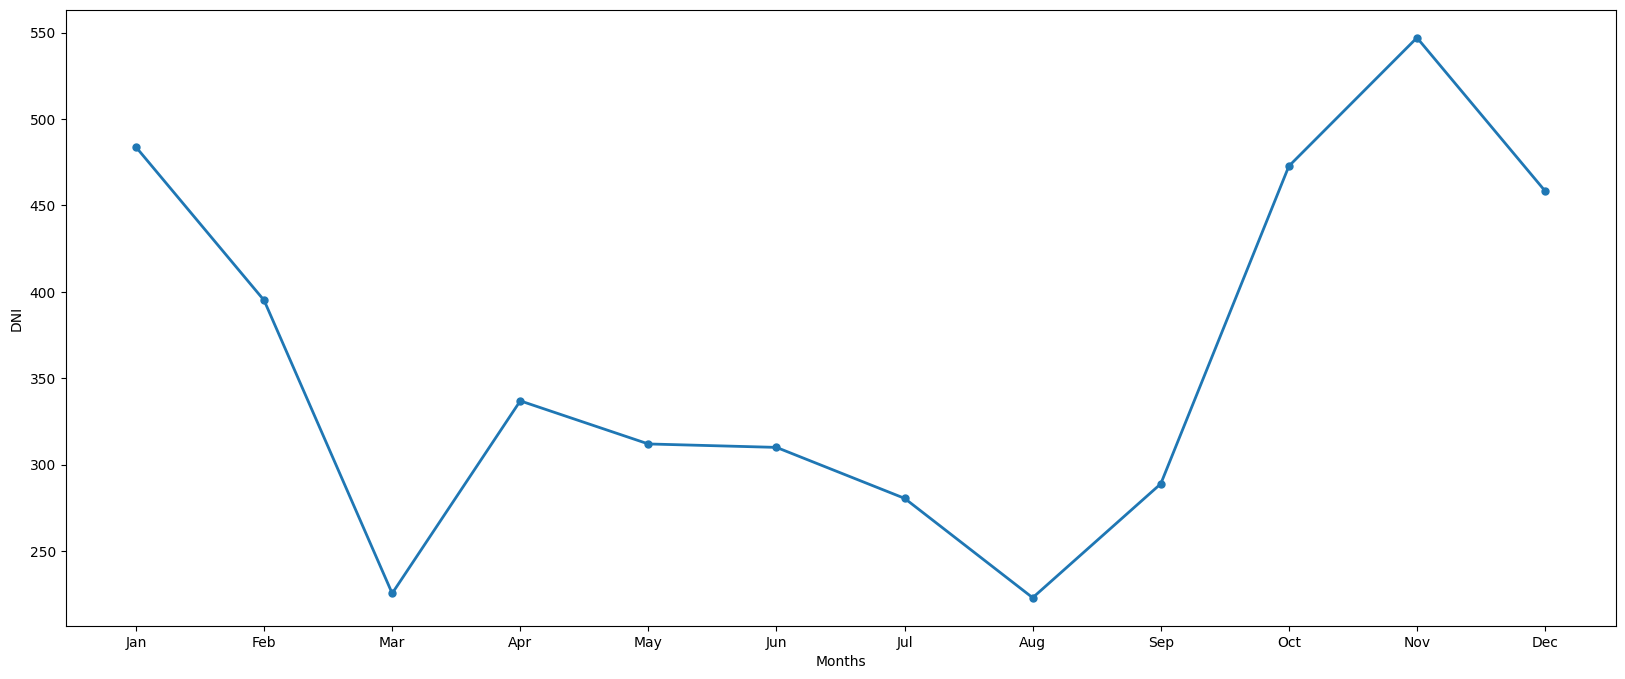

In [169]:
plot_line_chart(monthly_average_benin_df, 'DNI')

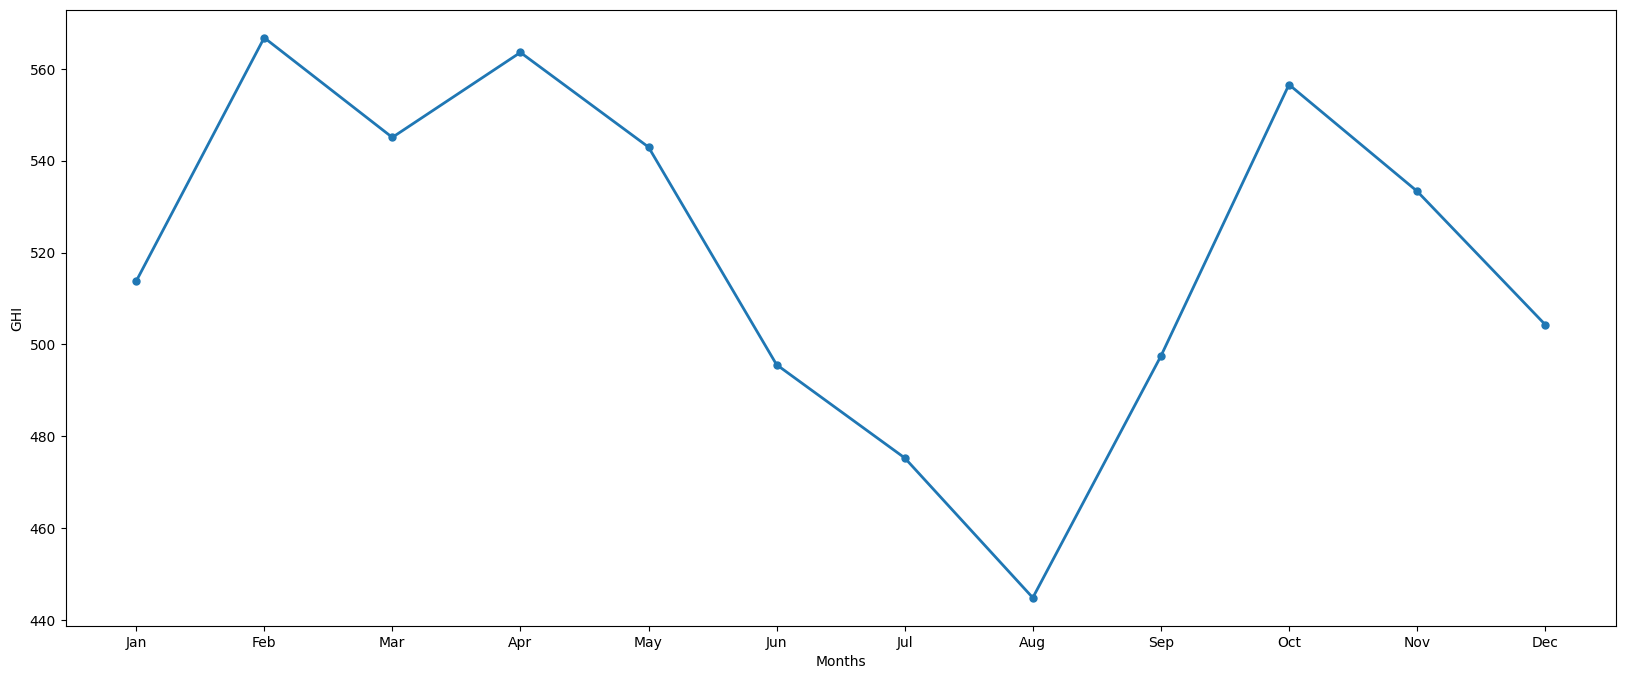

In [170]:
plot_line_chart(monthly_average_benin_df, 'GHI')

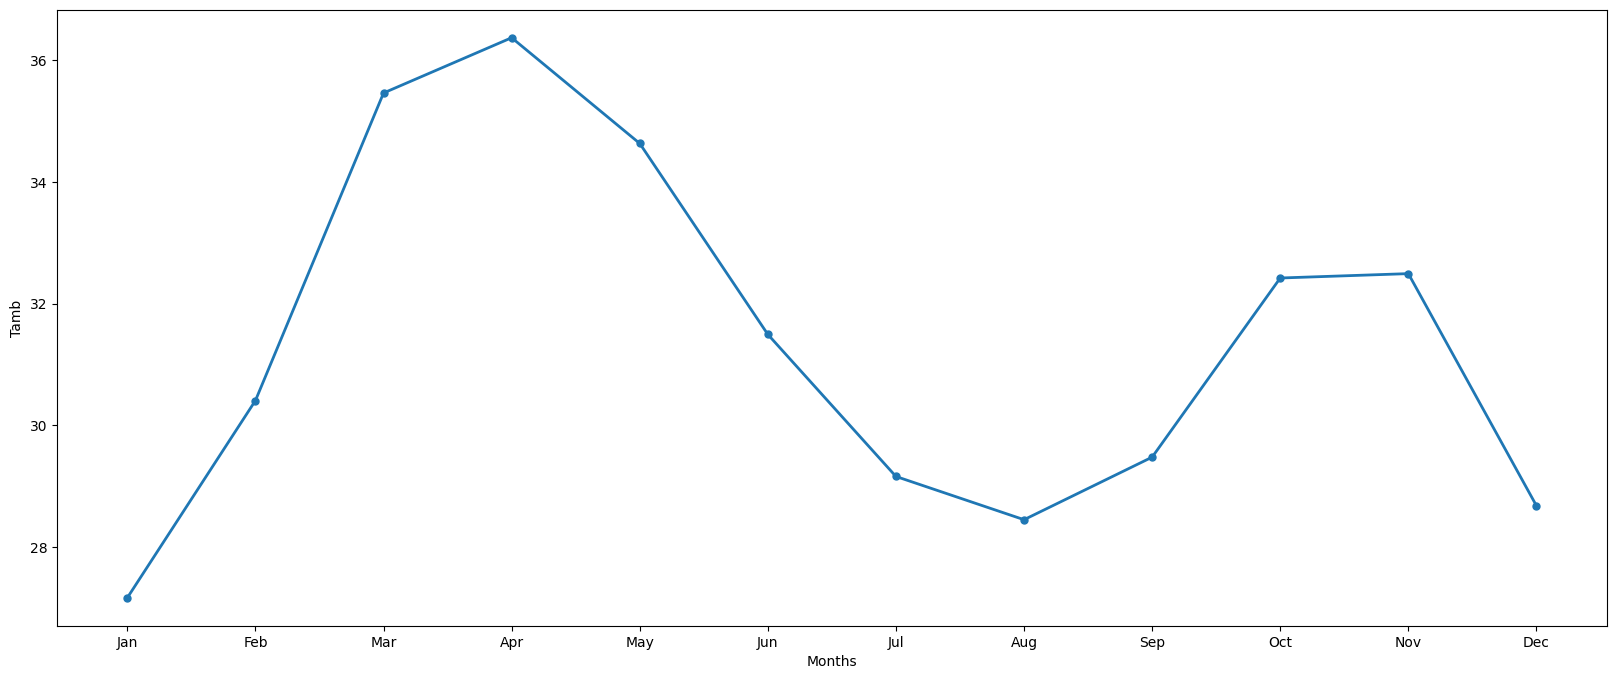

In [171]:
plot_line_chart(monthly_average_benin_df, 'Tamb')

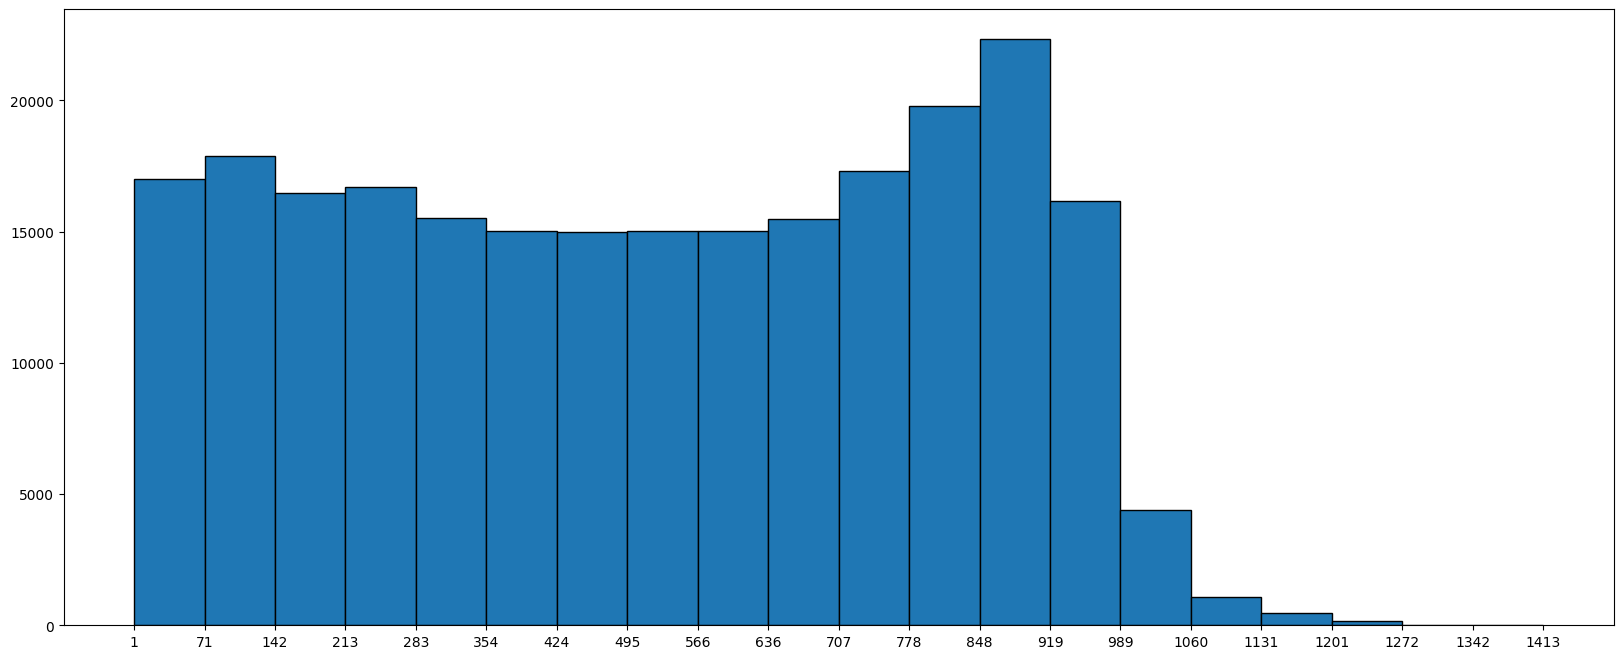

In [172]:
plot_histogram(benin_df, 20, 'GHI', 'Benin GHI Histogram (Distribution)')

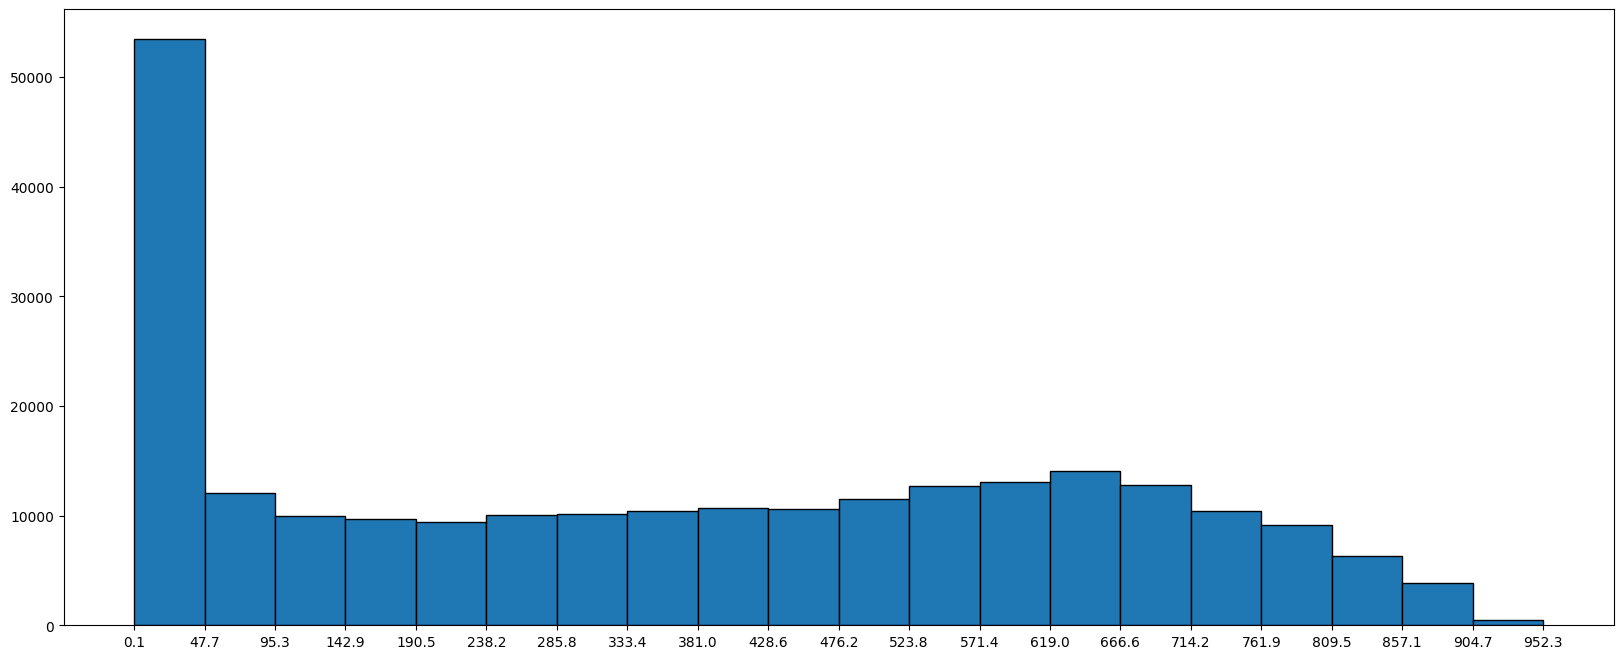

In [173]:
plot_histogram(benin_df, 20, 'DNI', 'Benin DNI Histogram (Distribution)')

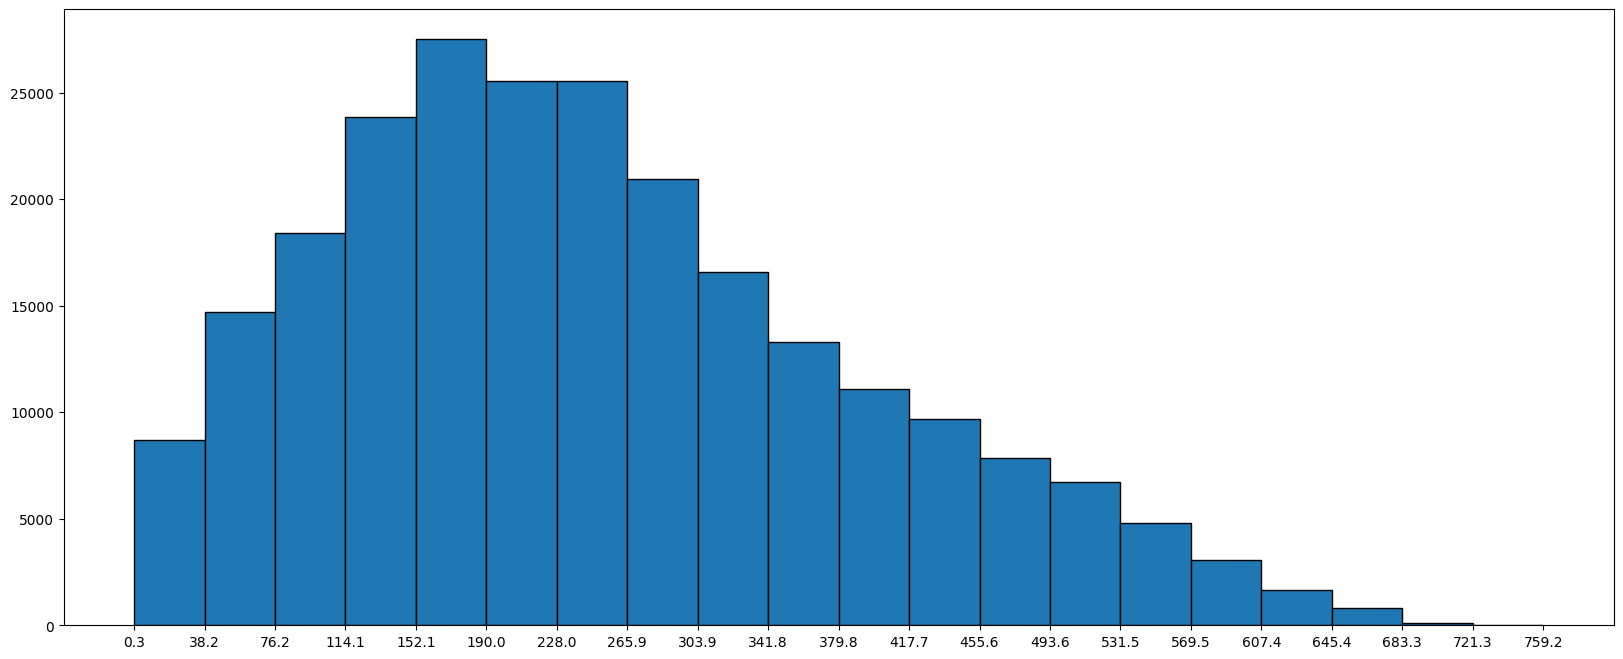

In [174]:
plot_histogram(benin_df, 20, 'DHI', 'Benin DHI Histogram Distribution')

### Benin Malanville - Correlation Analysis

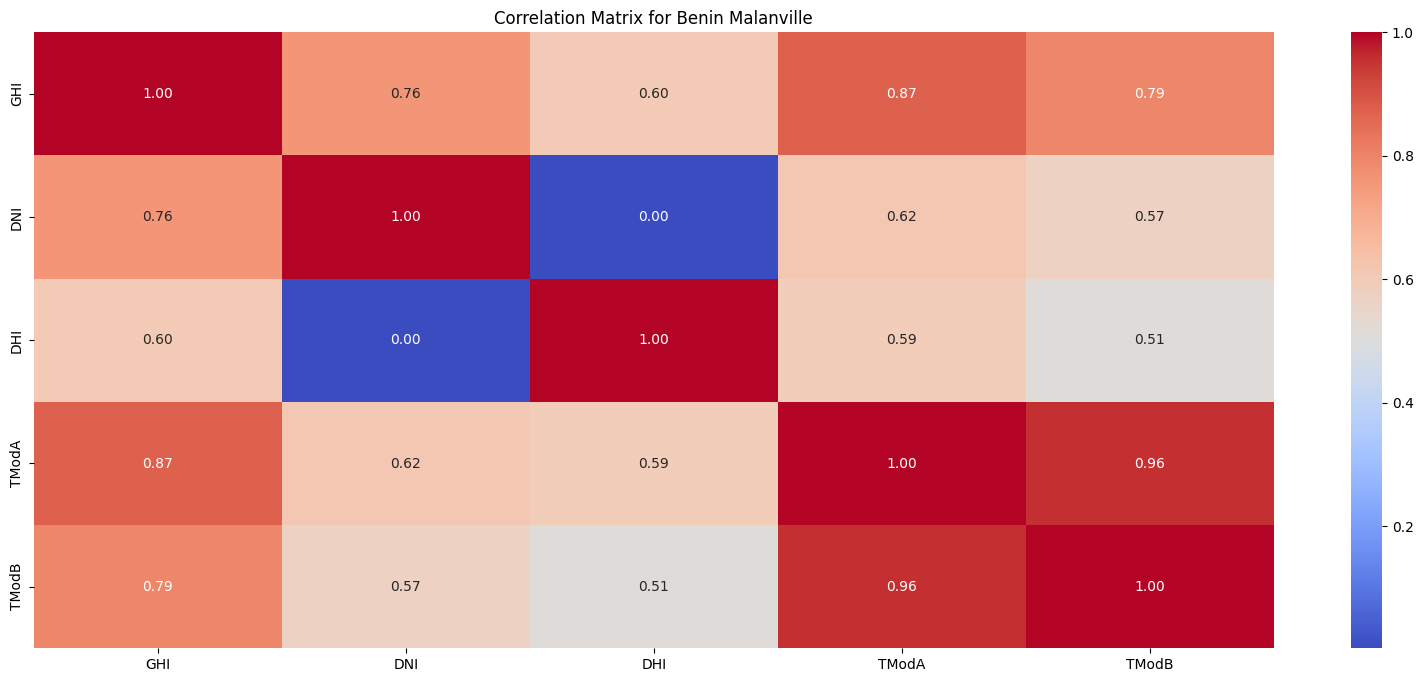

In [175]:
benin_corr = benin_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plot_heatmap(benin_corr, 'Correlation Matrix for Benin Malanville')

## Sierra Leone Bumbuna

### Sierra Leone Bumbuna - Summary Statistics and Data Cleaning

In [176]:
sierra_df = pd.read_csv('../data/raw/sierraleone-bumbuna.csv')
sierra_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [177]:
sierra_df.drop(sierra_df[(sierra_df['GHI'] <= 0) | (sierra_df['DNI'] <= 0) | (sierra_df['DHI'] <= 0)].index,
               inplace=True)
sierra_df.drop('Comments', axis=1, inplace=True)
sierra_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
489,2021-10-30 08:10,55.7,0.1,55.6,62.0,59.8,22.2,99.2,0.2,0.7,0.4,158.4,0.8,1003,0,0.0,23.6,23.8
491,2021-10-30 08:12,60.3,0.1,60.2,67.2,64.9,22.2,99.2,0.4,1.1,0.5,161.4,4.7,1003,0,0.0,23.8,23.9
492,2021-10-30 08:13,62.9,0.1,62.9,70.2,67.9,22.2,99.2,0.4,1.1,0.5,176.9,11.1,1003,0,0.1,23.8,24.0
493,2021-10-30 08:14,65.9,0.1,65.8,73.6,71.0,22.2,99.0,0.5,1.1,0.5,177.0,12.8,1003,0,0.0,23.9,24.0
494,2021-10-30 08:15,69.0,0.1,68.9,77.0,74.5,22.2,99.0,1.1,1.9,0.6,179.6,10.2,1003,0,0.0,23.9,24.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525182,2022-10-29 17:03,78.5,0.1,77.1,80.5,76.8,29.8,84.5,0.0,0.0,0.0,0.0,0.0,997,0,0.0,33.1,33.0
525183,2022-10-29 17:04,78.0,0.1,76.6,79.9,76.2,29.8,84.8,0.0,0.7,0.2,275.3,1.5,997,0,0.0,33.1,32.9
525184,2022-10-29 17:05,77.5,0.1,76.0,79.3,75.6,29.8,81.3,0.0,0.0,0.0,0.0,0.0,997,0,0.0,33.0,32.9
525211,2022-10-29 17:32,58.3,0.1,56.6,58.1,55.3,29.3,88.5,0.0,0.0,0.0,0.0,0.0,997,0,0.0,31.7,31.6


In [178]:
sierra_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.00000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000,230531.000000
mean,459.758961,265.666846,258.897173,464.216222,445.027759,29.319965,67.806282,1.591068,2.328892,0.47959,180.138451,10.959100,999.435920,0.002091,0.000990,43.397487,43.202654
std,289.497938,263.252302,138.277917,295.500234,284.263582,4.141583,21.916153,1.218280,1.515112,0.26221,104.632925,8.045496,2.363745,0.045678,0.025311,11.262833,10.689515
min,0.100000,0.100000,0.100000,0.000000,0.000000,12.400000,9.900000,0.000000,0.000000,0.00000,0.000000,0.000000,993.000000,0.000000,0.000000,11.700000,12.000000
25%,213.600000,5.650000,154.400000,209.100000,200.300000,26.300000,51.800000,0.500000,1.400000,0.40000,84.700000,5.600000,998.000000,0.000000,0.000000,34.800000,34.900000
50%,422.700000,189.200000,248.700000,420.500000,403.800000,29.500000,72.100000,1.600000,2.400000,0.50000,218.100000,10.800000,1000.000000,0.000000,0.000000,43.400000,43.700000
75%,697.500000,495.200000,353.200000,716.500000,683.000000,32.400000,84.400000,2.400000,3.400000,0.60000,255.500000,15.400000,1001.000000,0.000000,0.000000,52.500000,52.100000
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.10000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000


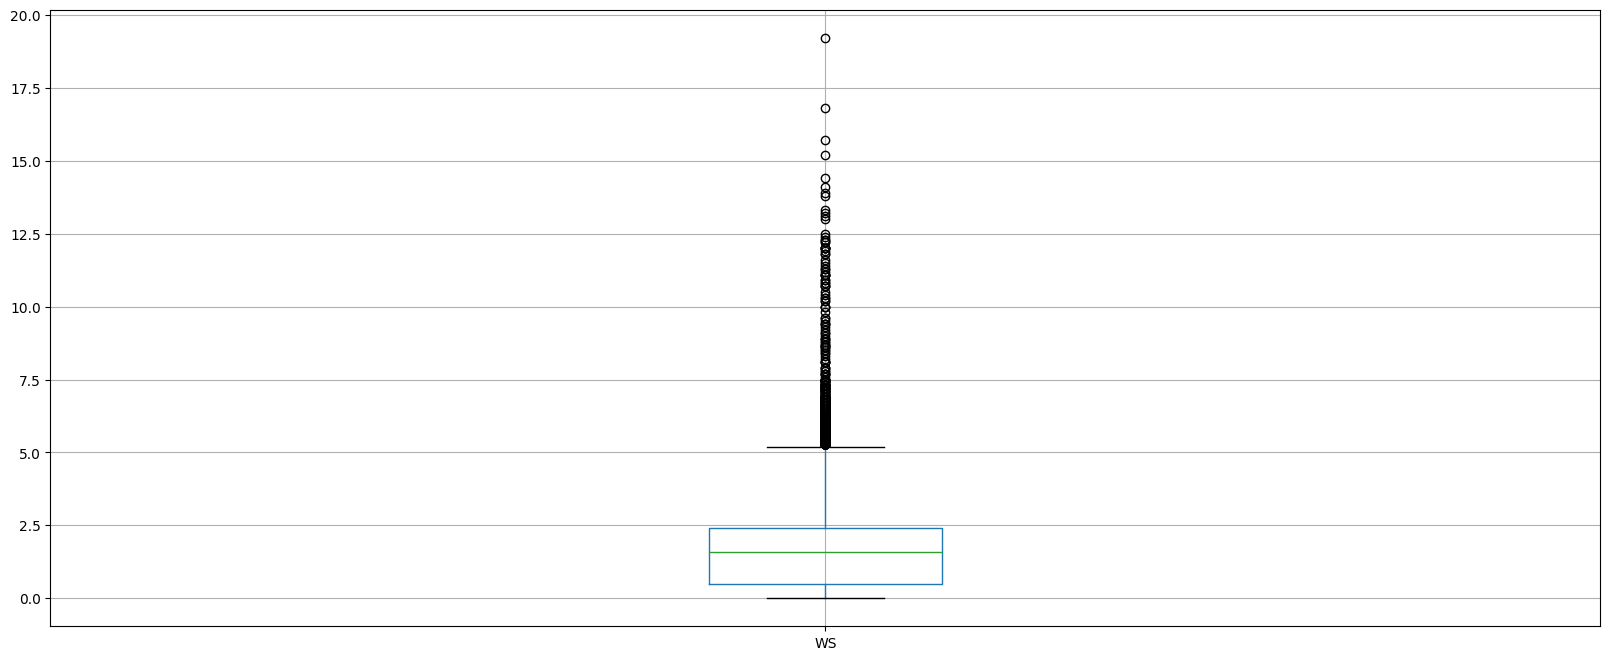

In [179]:
sierra_df.boxplot('WS', figsize=(20, 8))
plt.show()

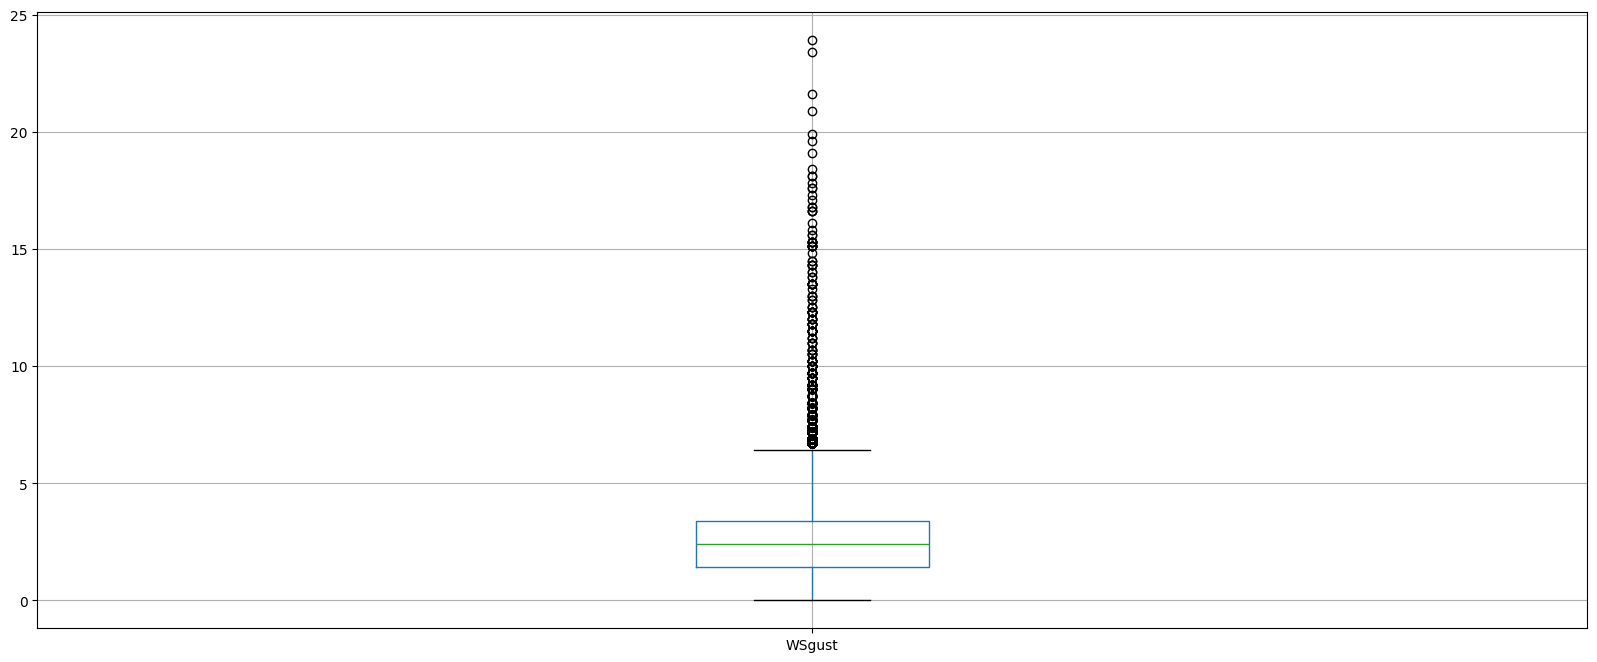

In [180]:
sierra_df.boxplot('WSgust', figsize=(20, 8))
plt.show()

In [181]:
sierra_df = remove_outliers_iqr(sierra_df, 'WS')
sierra_df = remove_outliers_iqr(sierra_df, 'WSgust')

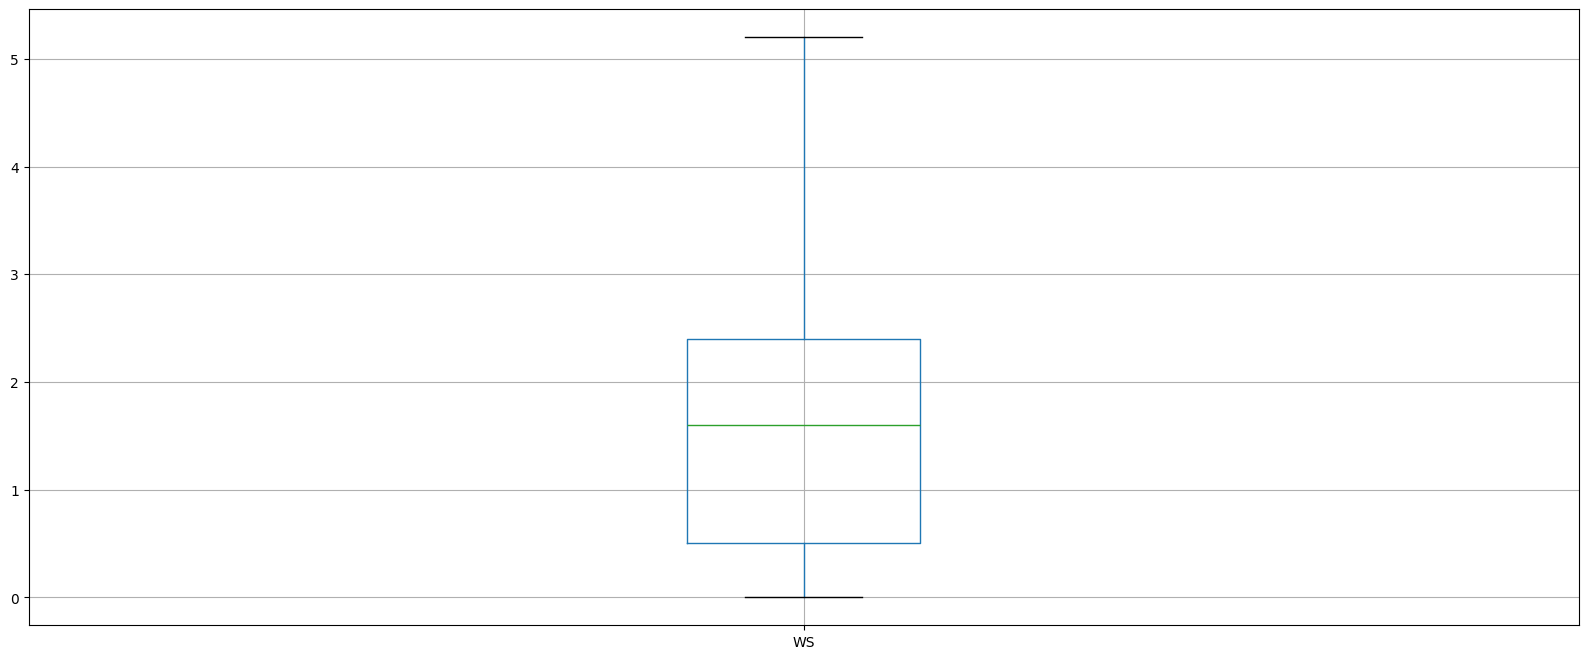

In [182]:
sierra_df.boxplot('WS', figsize=(20, 8))
plt.show()

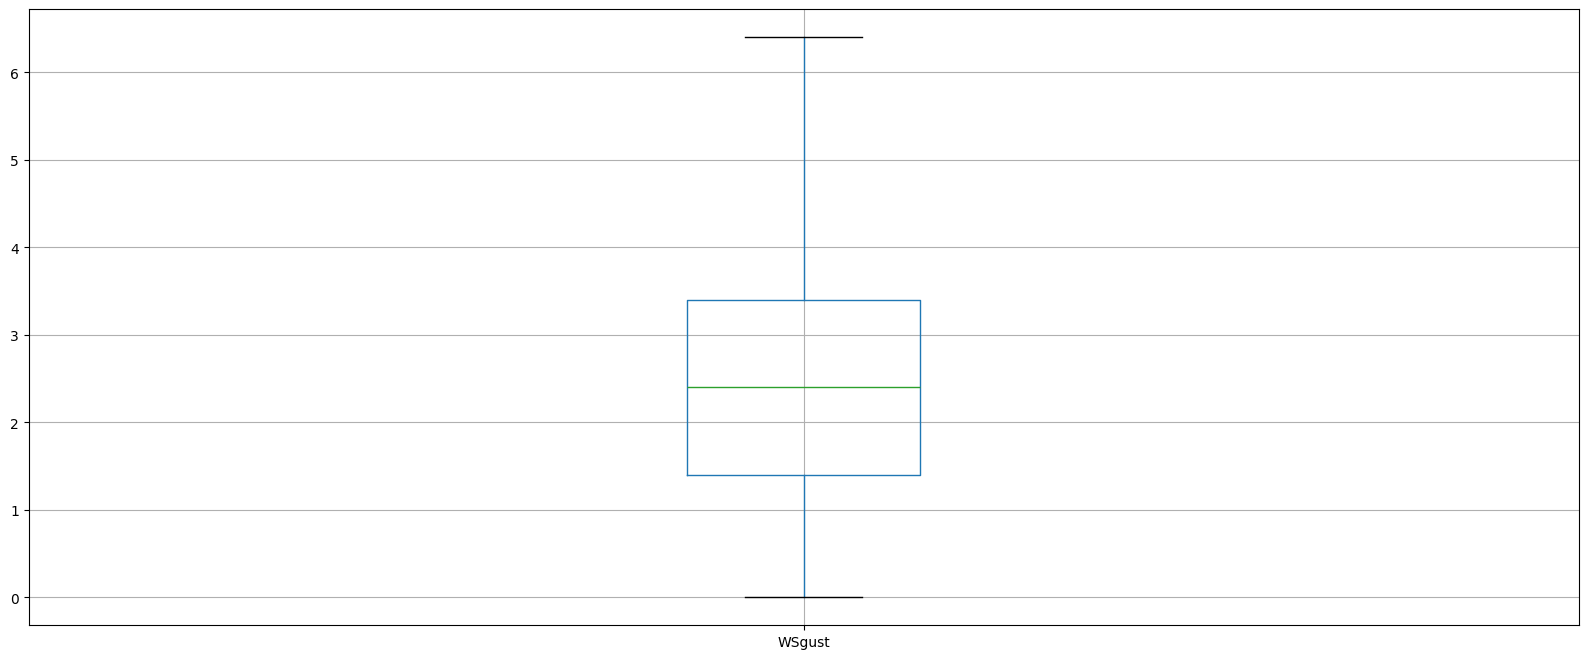

In [183]:
sierra_df.boxplot('WSgust', figsize=(20, 8))
plt.show()

In [184]:
try:
    sierra_df.to_csv('../data/clean/sierra_clean.csv')
except Exception as e:
    print(f'Something went wrong while trying to save the file, {e}')

### Sierra Leone - Time Series Analysis

In [185]:
sierra_df['Timestamp'] = pd.to_datetime(sierra_df['Timestamp'])
sierra_df['Timestamp'].dtype

dtype('<M8[ns]')

In [186]:
sierra_df['Month'] = sierra_df['Timestamp'].dt.month
sierra_df['Month'].dtype

dtype('int32')

In [187]:
monthly_average_sierra_df = sierra_df.groupby('Month').mean()
monthly_average_sierra_df.head(20)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Month,,,,,,,,,,,,,,,,,,
1,2022-01-16 13:53:48.762060288,448.158916,374.625744,186.119521,503.977421,472.371377,30.337404,45.665419,1.788836,2.567175,0.513977,155.157532,13.184078,999.023483,0.001429,0.000000,45.930338,45.057594
2,2022-02-15 00:25:26.857391616,487.463358,319.584804,245.278560,522.109801,500.127227,31.383362,46.449336,1.819553,2.645328,0.525269,174.708849,12.602904,998.321821,0.001740,0.000000,46.858860,46.762977
3,2022-03-16 13:13:21.808624640,509.152969,280.460055,283.142320,519.263389,484.747124,31.666933,49.539901,1.820583,2.642252,0.518369,191.606999,12.717887,997.339531,0.002677,0.000073,46.740845,46.499255
4,2022-04-16 01:04:19.324877568,513.410406,309.412634,258.177145,497.152831,478.506352,31.532822,56.587212,2.074238,2.933501,0.546375,203.690263,13.709498,997.760112,0.002597,0.000000,45.299875,45.243434
5,2022-05-16 14:53:18.707472896,447.512262,218.903006,272.303397,410.883341,398.134958,29.612613,73.904457,1.537850,2.232274,0.459065,187.396608,10.987827,1000.070718,0.002179,0.000342,41.773095,41.859219
6,2022-06-15 17:39:06.797162496,453.754227,226.784799,273.855176,409.338887,389.423073,28.129372,79.411062,1.264313,1.939037,0.434733,178.604134,8.442472,1000.253987,0.002507,0.000443,40.159678,40.471476
7,2022-07-16 13:30:36.229351936,388.315846,127.980104,290.251541,358.072321,345.486229,26.875296,83.903801,1.395134,2.078828,0.447305,179.365777,8.867964,1001.777690,0.001959,0.001827,37.471606,37.781835
8,2022-08-16 18:43:10.869232128,382.145412,107.227904,298.093076,366.143644,356.129572,26.374041,87.967246,1.319818,2.023178,0.450345,171.241711,8.394743,1000.804585,0.002475,0.004544,36.635046,36.661518
9,2022-09-15 18:57:41.454665728,451.524877,189.589438,303.437514,441.213907,430.791700,27.554804,82.626428,1.409652,2.097224,0.445516,176.127636,9.146896,1000.741129,0.002318,0.000883,41.192241,41.048623


#### Sierra Leone - Bar Charts

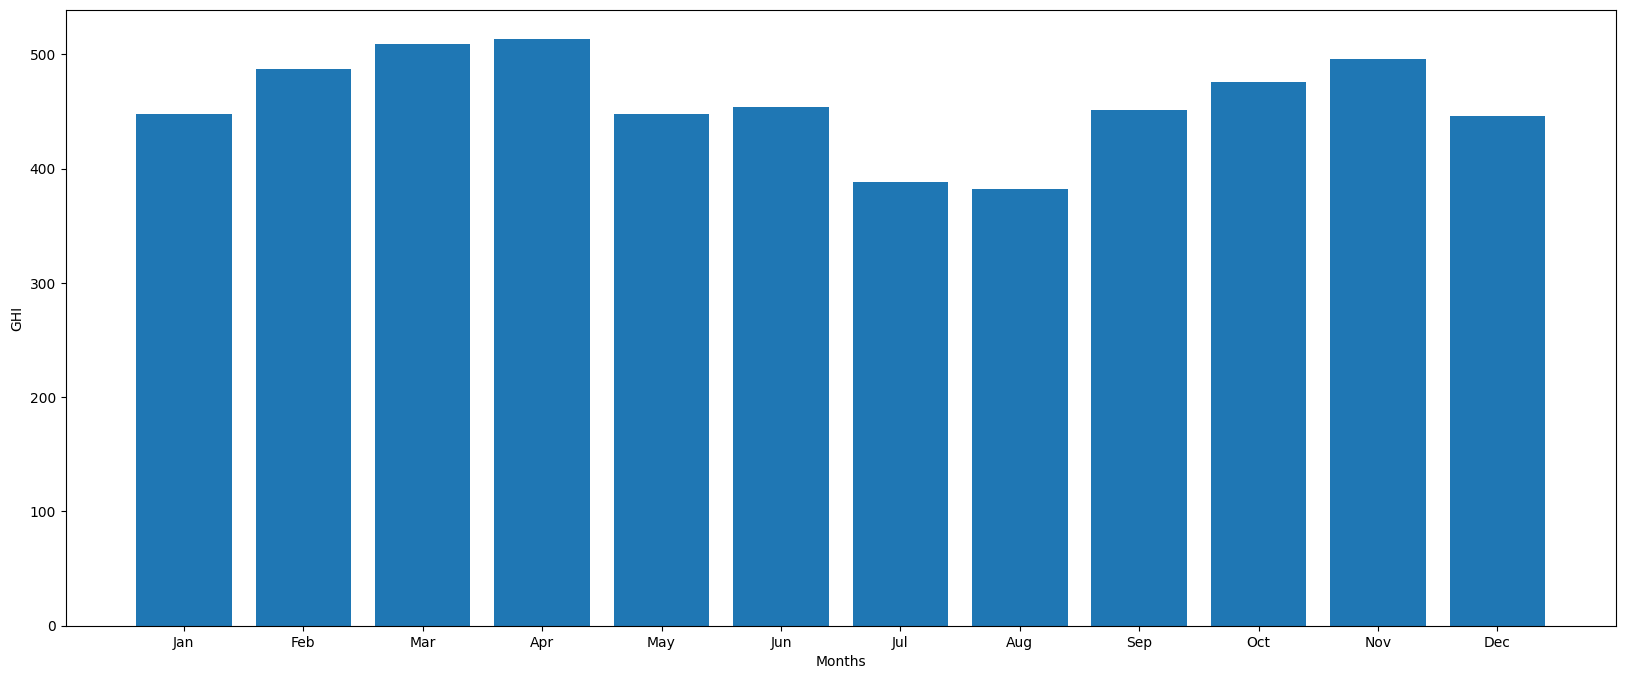

In [188]:
# plot bar chart for the numeric columns
# plot the columns -> GHI, DNI, DHI, and Tamb
plot_bar_chart(monthly_average_sierra_df, 'GHI')

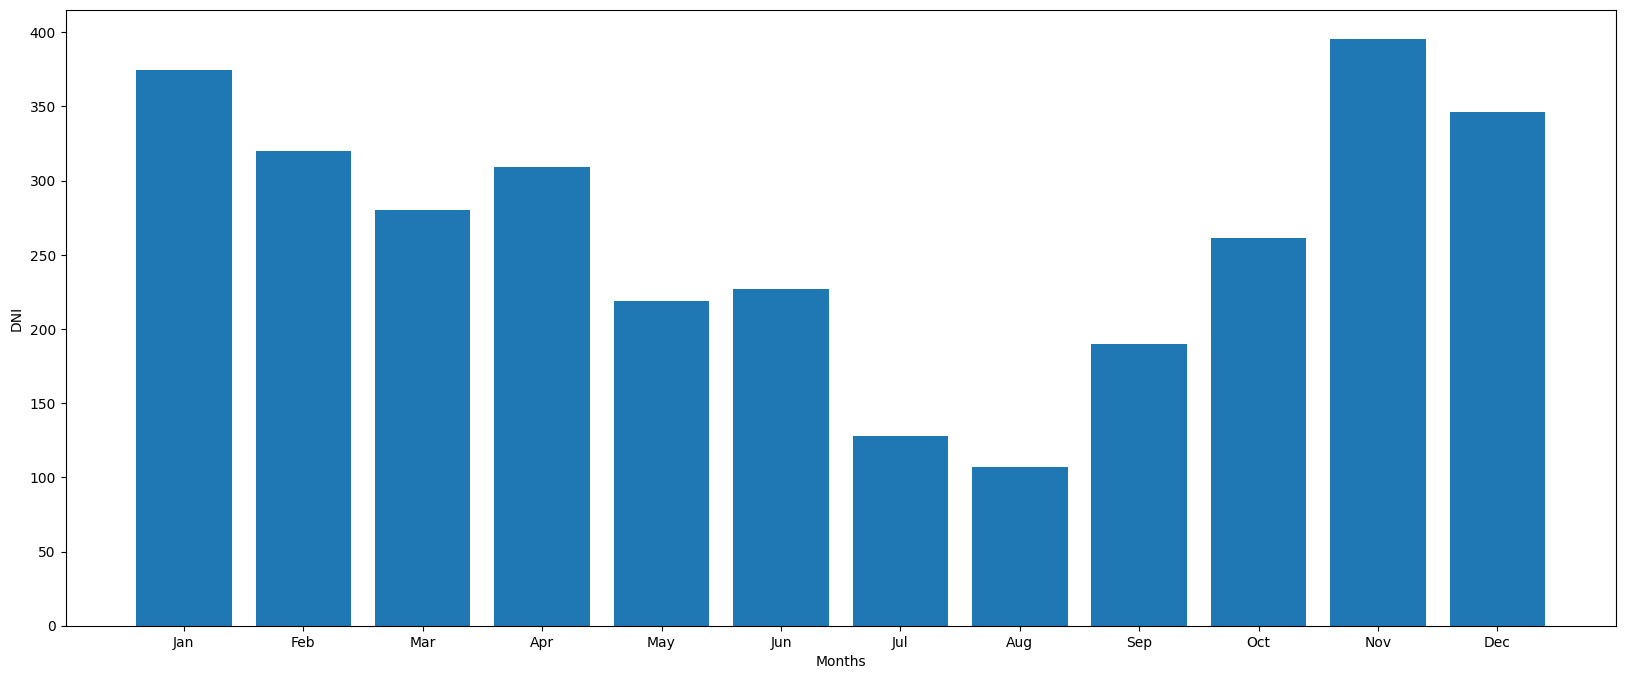

In [189]:
plot_bar_chart(monthly_average_sierra_df, 'DNI')

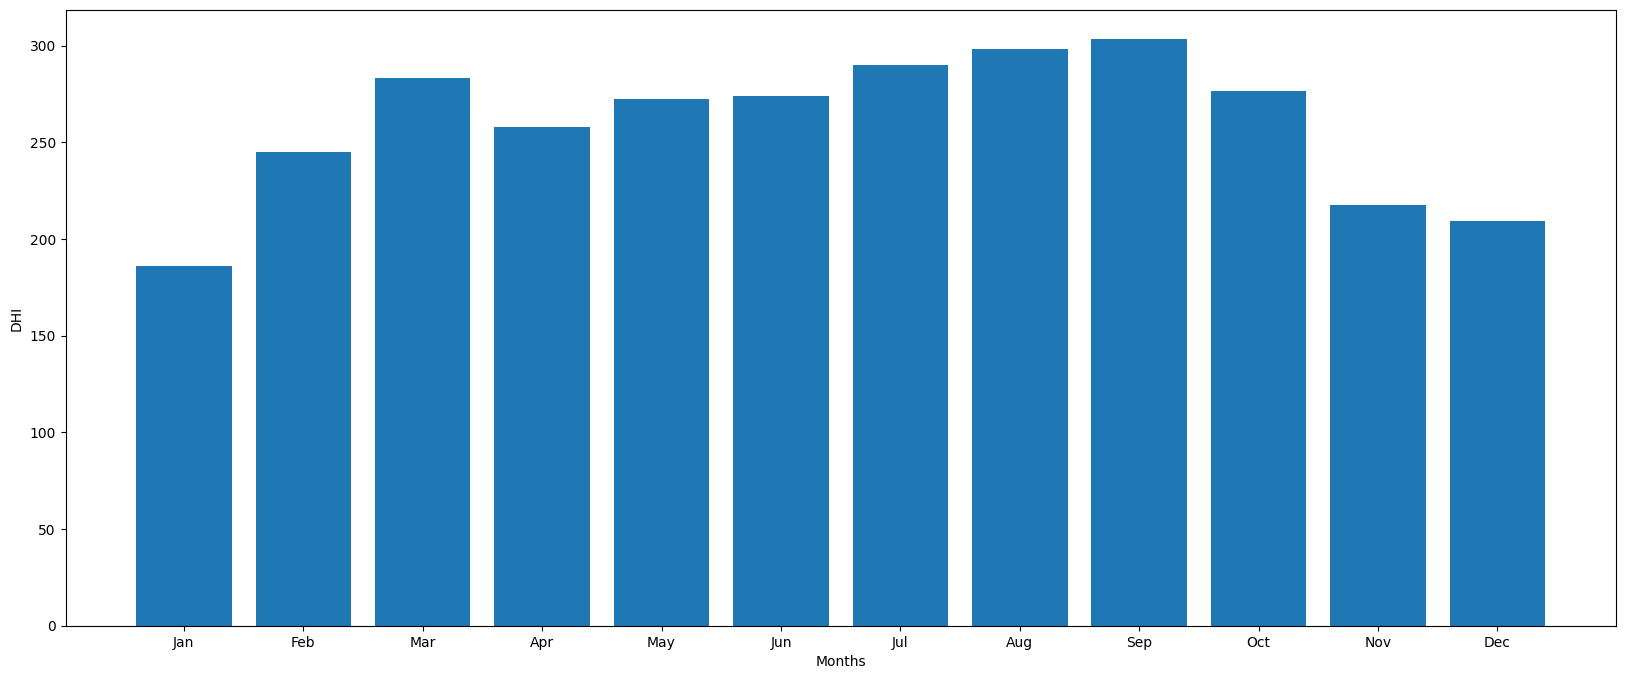

In [190]:
plot_bar_chart(monthly_average_sierra_df, 'DHI')

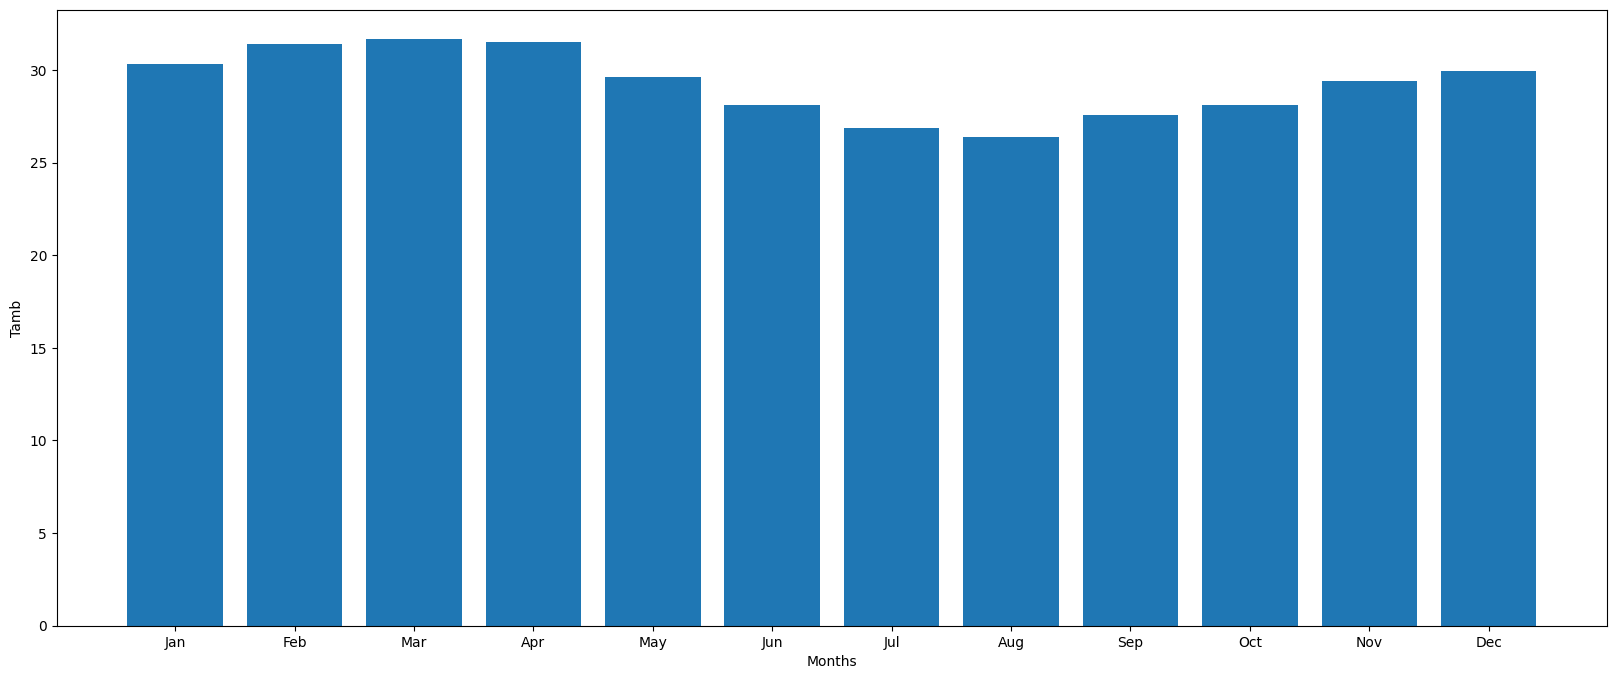

In [191]:
plot_bar_chart(monthly_average_sierra_df, 'Tamb')

#### Sierra Leone - Line Charts

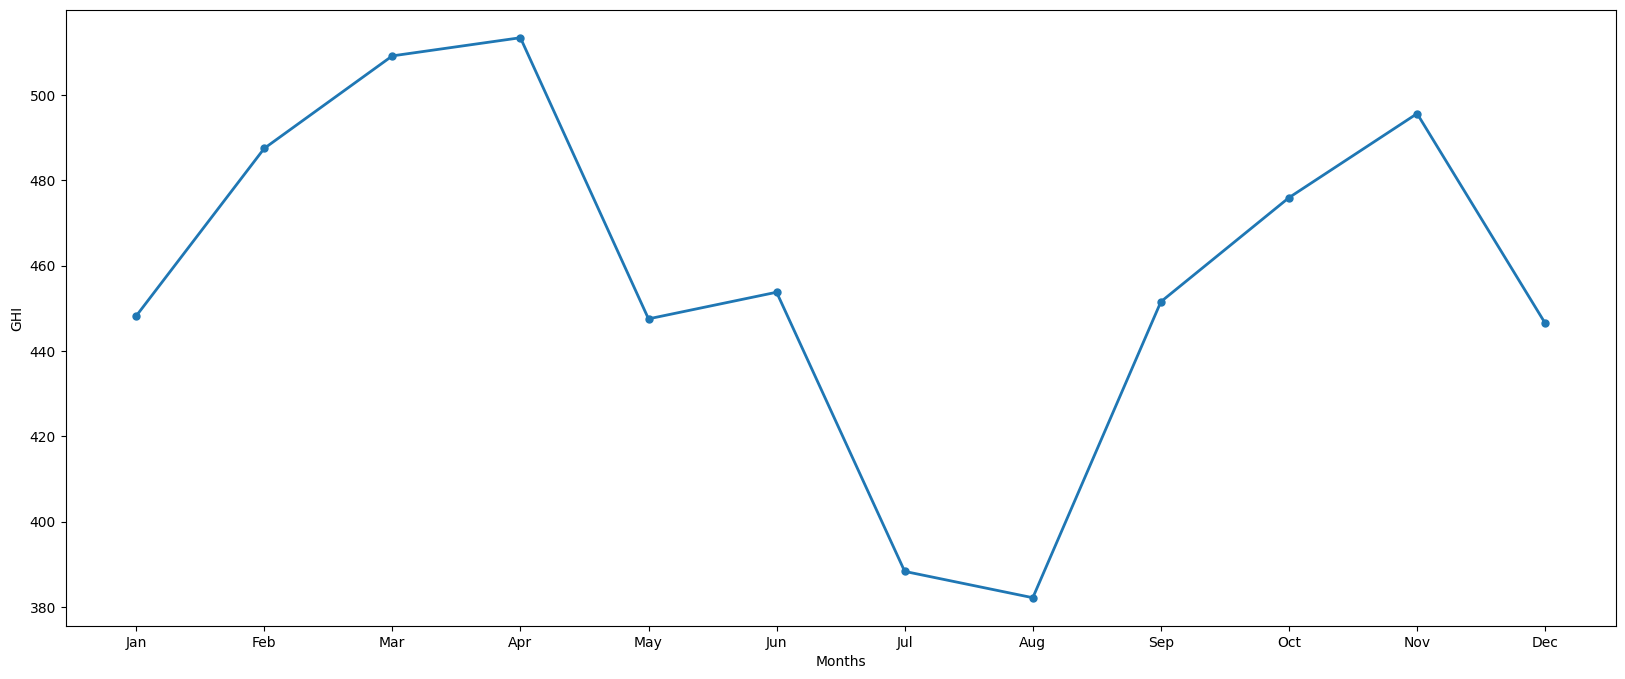

In [192]:
# plot the line charts for the numeric columns
# plot the columns -> GHI, DNI, DHI, and Tamb
plot_line_chart(monthly_average_sierra_df, 'GHI')

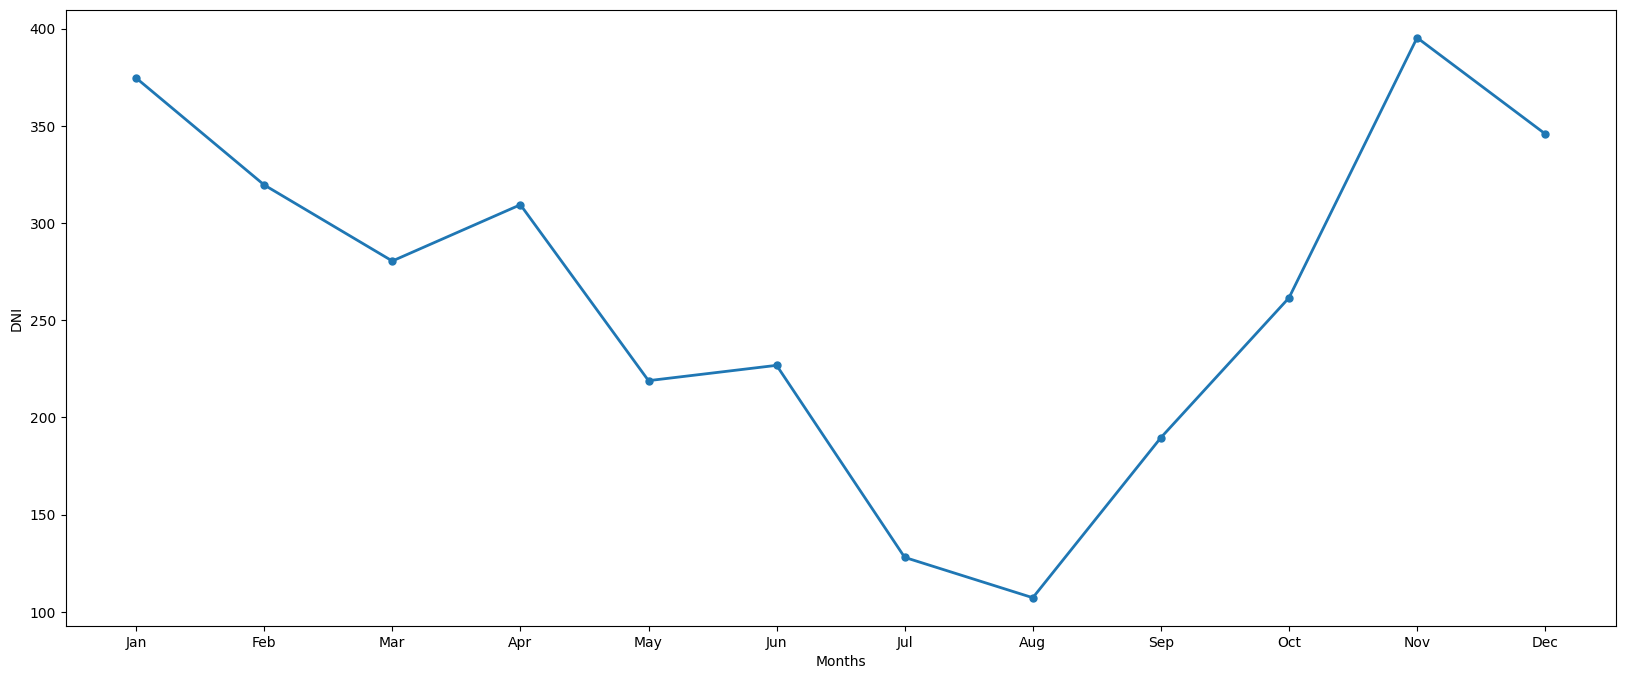

In [193]:
plot_line_chart(monthly_average_sierra_df, 'DNI')

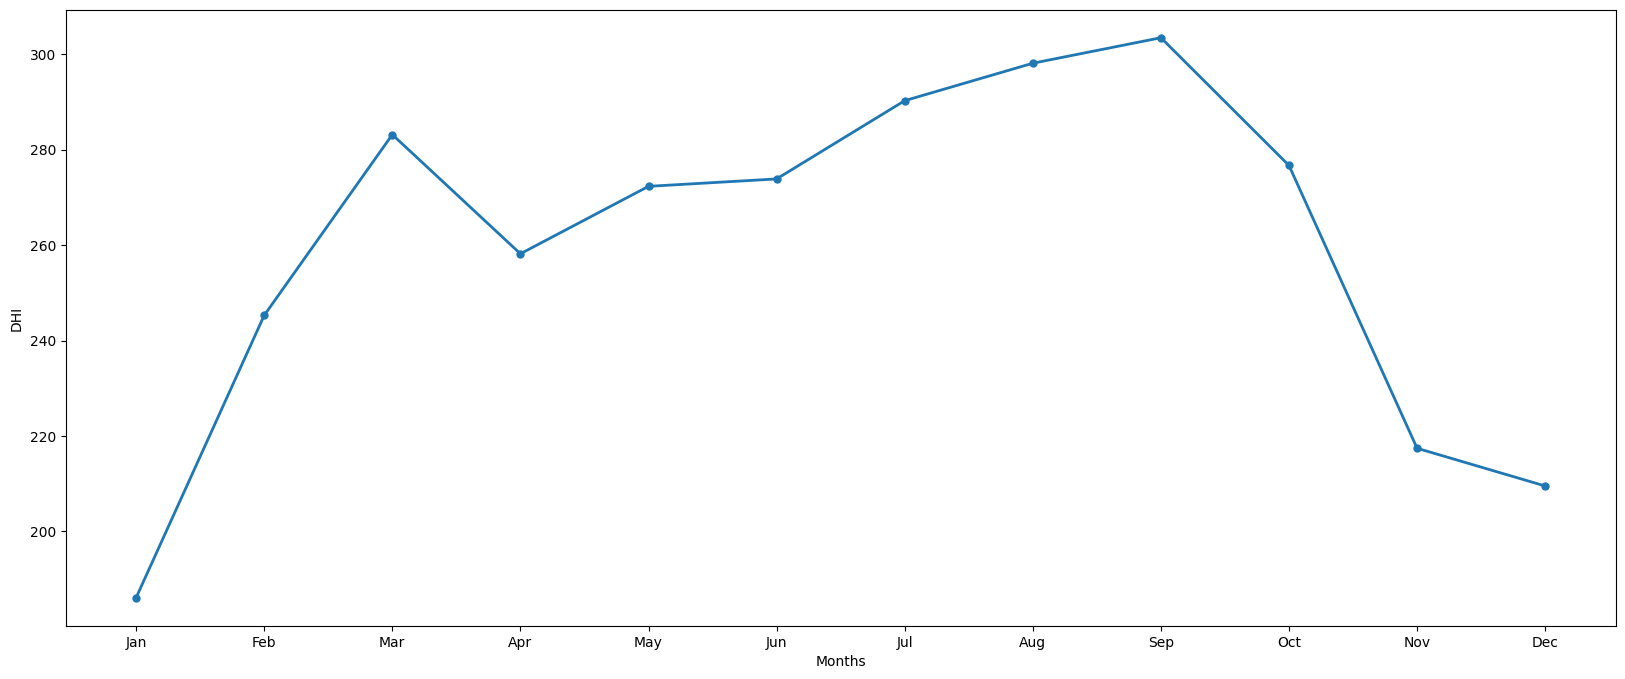

In [194]:
plot_line_chart(monthly_average_sierra_df, 'DHI')

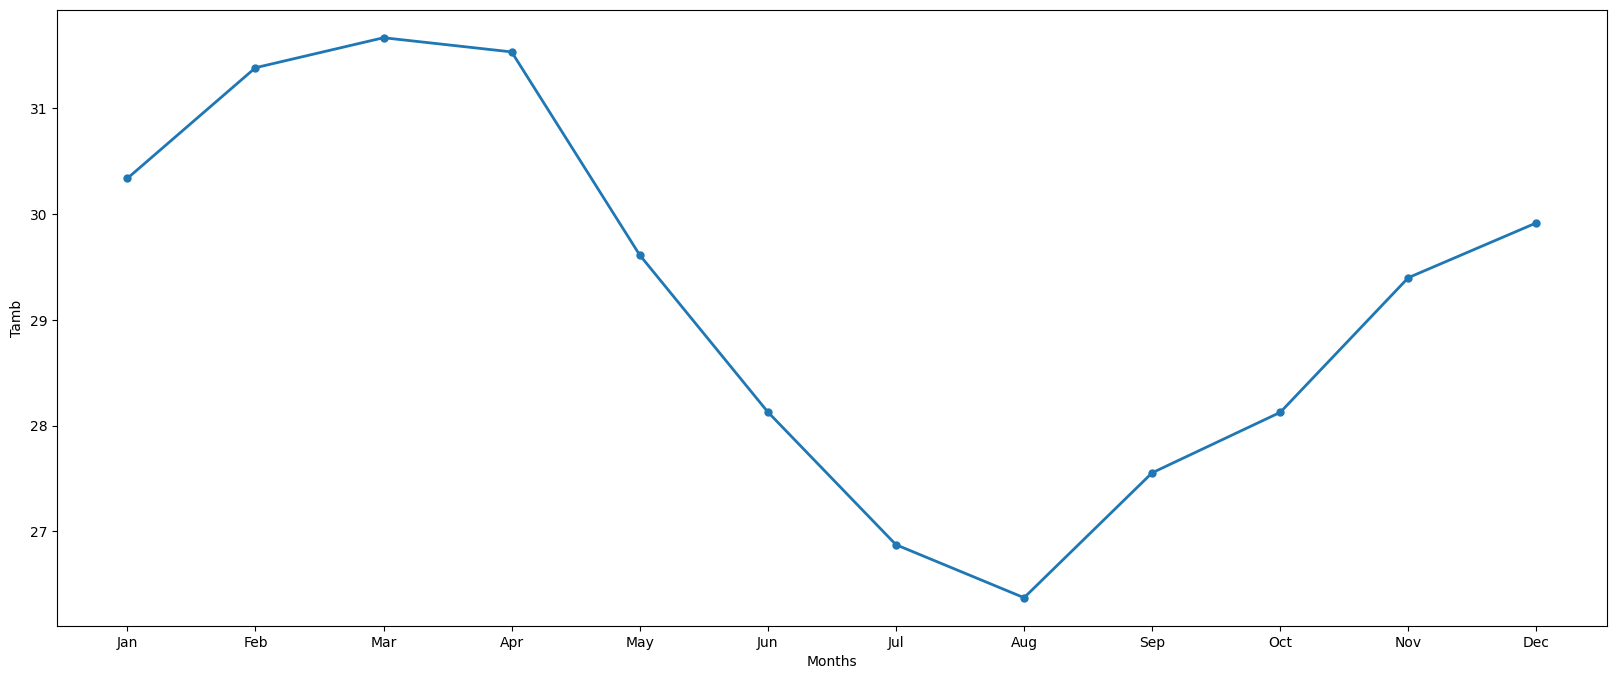

In [195]:
plot_line_chart(monthly_average_sierra_df, 'Tamb')

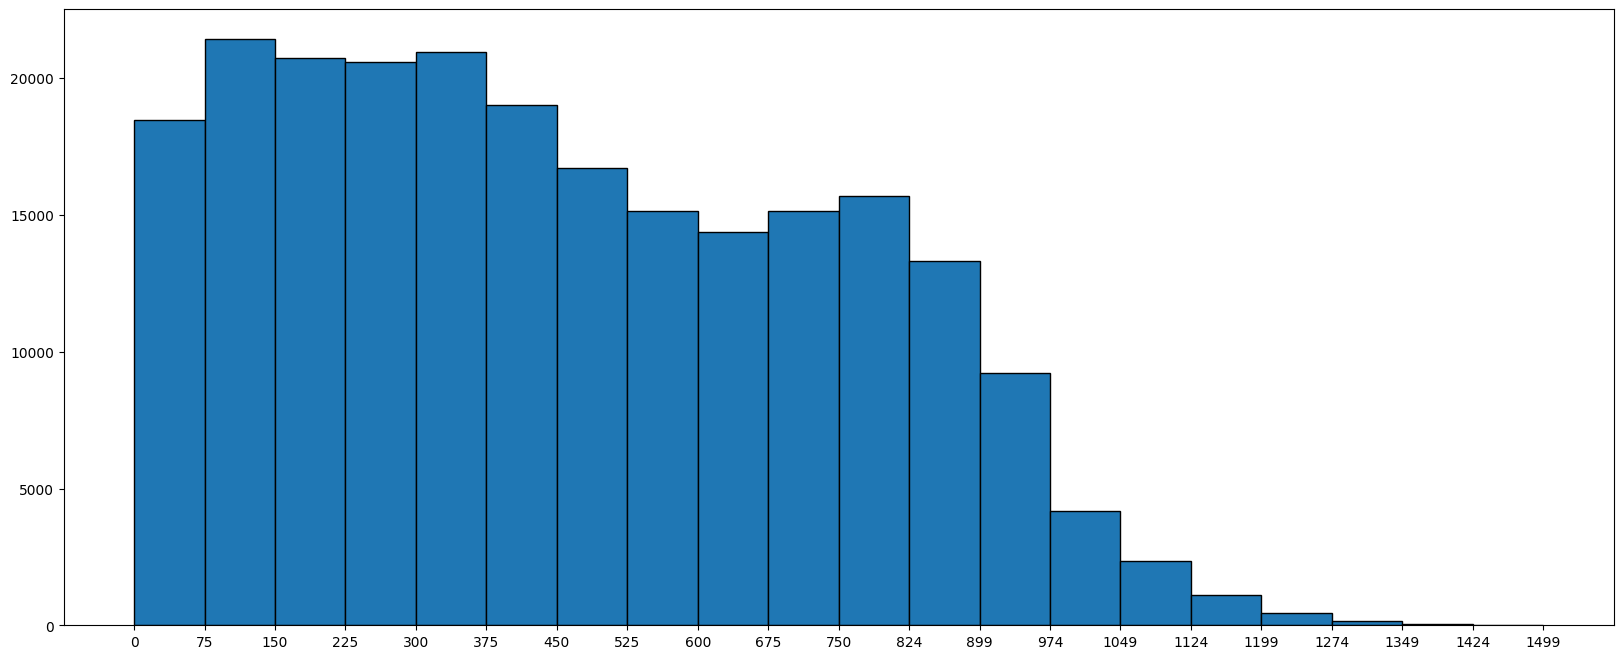

In [196]:
plot_histogram(sierra_df, 20, 'GHI', 'Sierra Leone GHI Histogram')

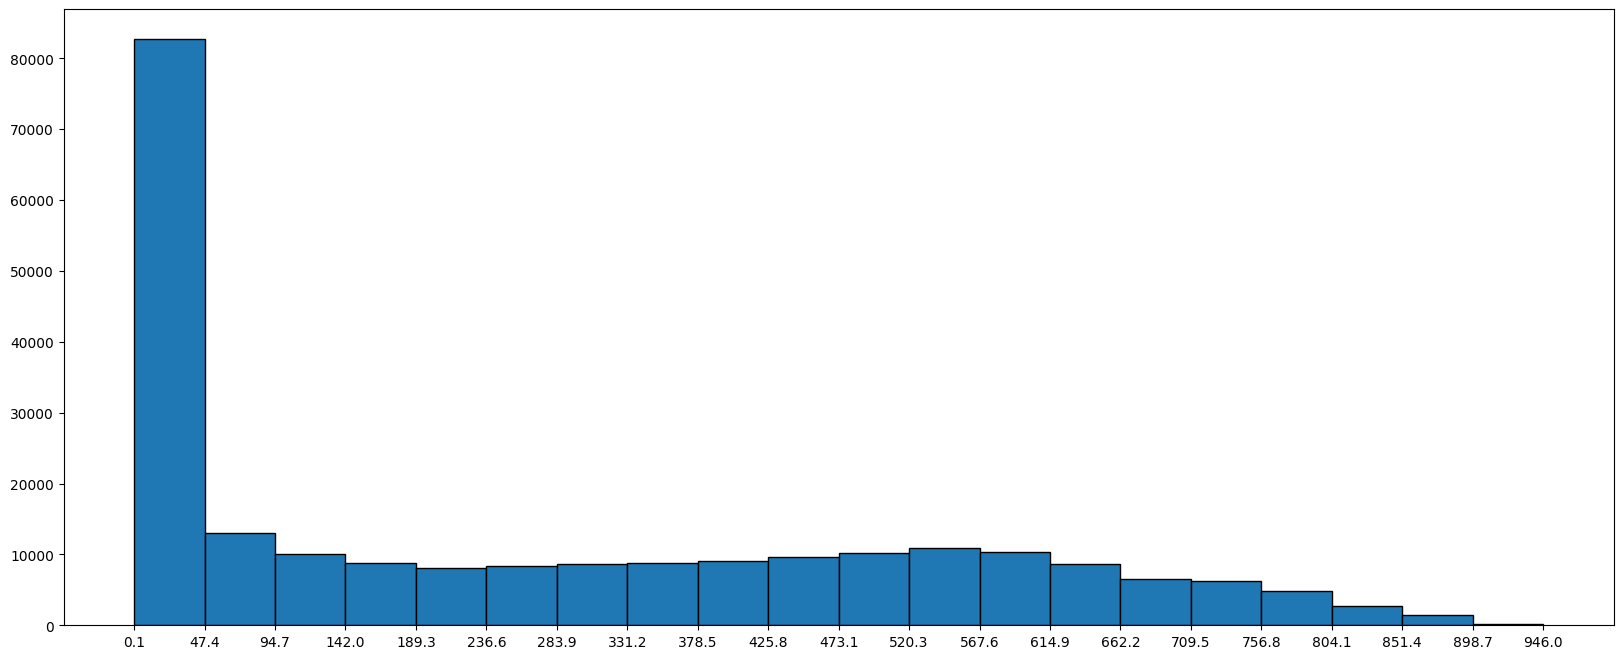

In [197]:
plot_histogram(sierra_df, 20, 'DNI', 'Sierra Leone DNI Histogram Distribution')

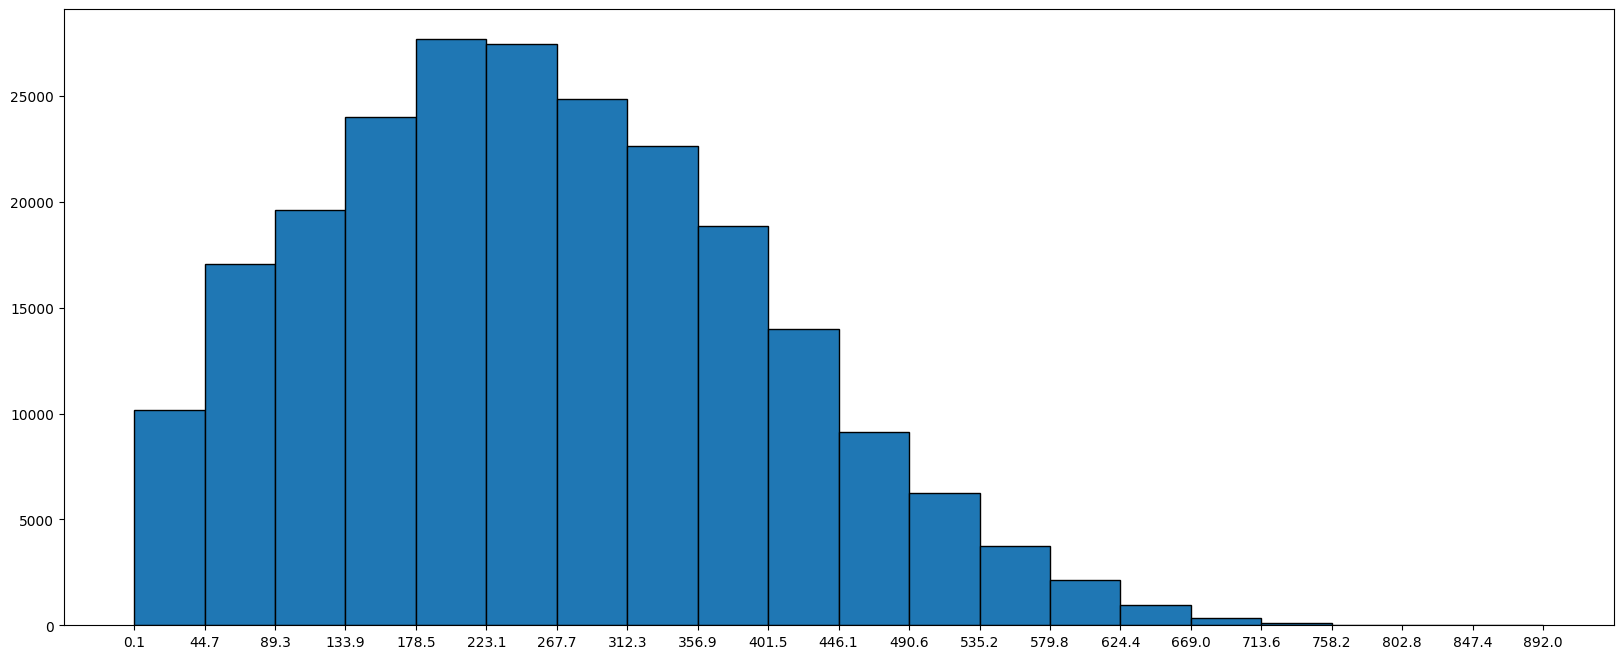

In [198]:
plot_histogram(sierra_df, 20, 'DHI', 'Sierra Leone DNI Histogram Distribution')

### Sierra Leone - Correlation Analysis

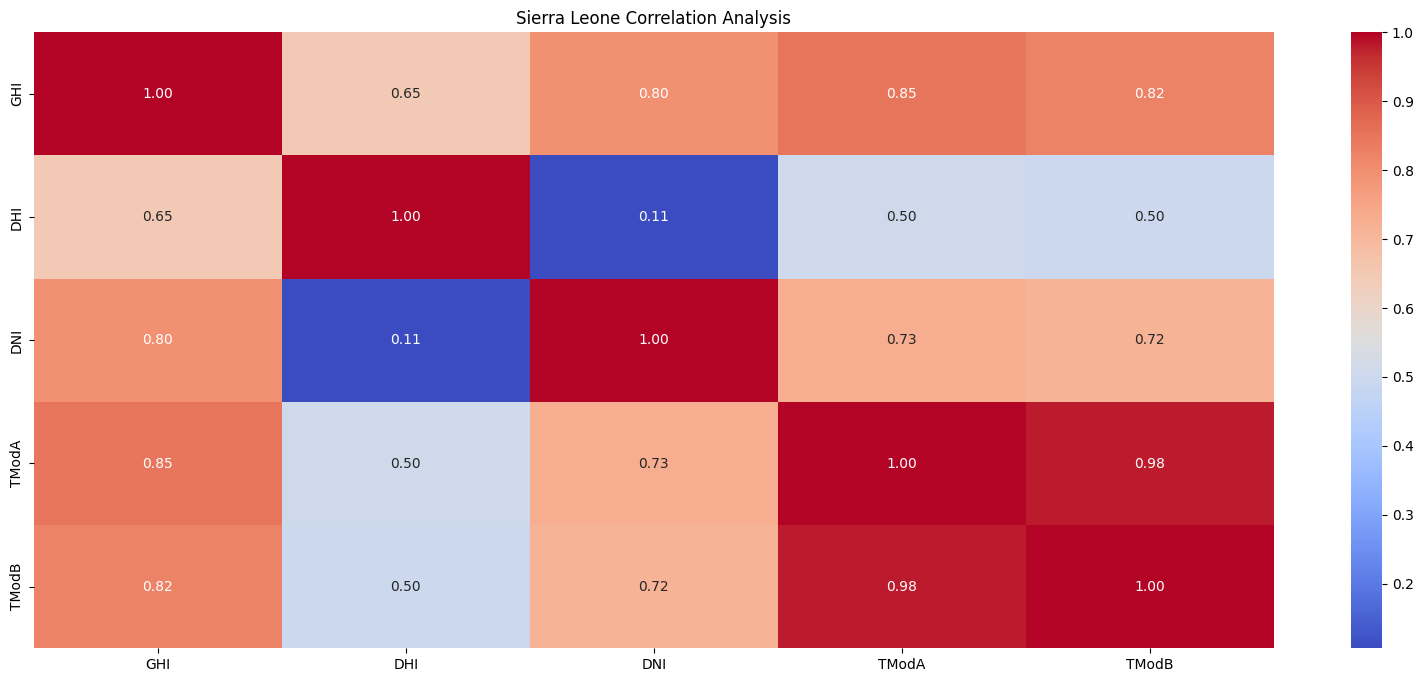

In [199]:
sierra_corr = sierra_df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr()
plot_heatmap(sierra_corr, 'Sierra Leone Correlation Analysis')

## Togo Dapaong QC

### Togo Dapaong QC - Summary Statistics and Data Cleaning

In [200]:
togo_df = pd.read_csv('../data/raw/togo-dapaong_qc.csv')
togo_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [201]:
togo_df.drop(togo_df[(togo_df['GHI'] <= 0) | (togo_df['DNI'] <= 0) | (togo_df['DHI'] <= 0)].index, inplace=True)
togo_df.drop('Comments', axis=1, inplace=True)
togo_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
360,2021-10-25 06:01,9.5,4.2,9.1,10.3,10.3,25.1,90.9,1.7,2.1,0.4,228.1,5.3,977,0,0.0,24.9,24.7
361,2021-10-25 06:02,10.5,3.0,10.2,11.3,11.2,25.1,90.8,1.9,2.4,0.3,224.6,4.6,977,0,0.0,24.9,24.7
362,2021-10-25 06:03,11.5,3.7,11.3,12.3,12.2,25.1,90.5,2.1,2.6,0.4,226.3,5.9,977,0,0.0,24.9,24.7
363,2021-10-25 06:04,12.7,10.3,12.2,13.4,13.3,25.2,89.9,1.8,2.4,0.5,233.1,8.7,977,0,0.0,24.9,24.7
365,2021-10-25 06:06,14.9,12.3,14.5,15.4,15.3,25.3,89.5,1.9,2.4,0.4,225.0,9.4,977,0,0.0,24.9,24.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525198,2022-10-24 17:19,31.3,31.0,30.8,34.5,33.2,31.4,39.5,1.1,2.1,0.6,83.3,12.1,976,0,0.0,31.3,30.9
525199,2022-10-24 17:20,29.1,32.0,28.6,32.3,31.2,31.4,40.6,1.4,2.6,0.6,83.2,11.0,976,0,0.0,31.2,30.7
525200,2022-10-24 17:21,26.8,31.4,26.5,30.2,29.1,31.4,40.3,1.2,2.1,0.5,90.3,12.2,976,0,0.0,31.1,30.6
525201,2022-10-24 17:22,25.0,26.6,25.2,28.7,27.6,31.3,40.3,1.7,2.4,0.5,85.6,11.7,976,0,0.0,31.0,30.5


In [202]:
togo_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000,220837.000000
mean,532.450760,360.000595,258.121540,519.356081,503.977013,30.631723,46.558437,3.012843,4.099199,0.667295,169.842528,13.624860,975.951276,0.001209,0.000086,42.429539,45.320663
std,294.129536,273.397133,141.129863,296.307490,287.481730,4.602451,26.562968,1.429744,1.777600,0.255157,88.744328,5.581636,2.356149,0.034750,0.005066,9.574768,11.039313
min,3.700000,0.100000,4.700000,5.500000,5.500000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,14.000000,13.700000
25%,281.800000,84.500000,149.400000,261.600000,254.400000,27.500000,19.000000,2.100000,2.900000,0.500000,82.200000,10.400000,974.000000,0.000000,0.000000,35.900000,37.600000
50%,540.900000,351.200000,240.800000,520.700000,505.600000,30.800000,48.700000,3.000000,4.000000,0.600000,200.200000,13.200000,976.000000,0.000000,0.000000,42.900000,45.600000
75%,791.900000,597.800000,355.000000,787.200000,762.000000,34.000000,69.500000,3.900000,5.200000,0.800000,240.500000,16.400000,978.000000,0.000000,0.000000,49.300000,53.200000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,14.300000,19.300000,3.200000,360.000000,86.900000,983.000000,1.000000,0.700000,70.400000,94.600000


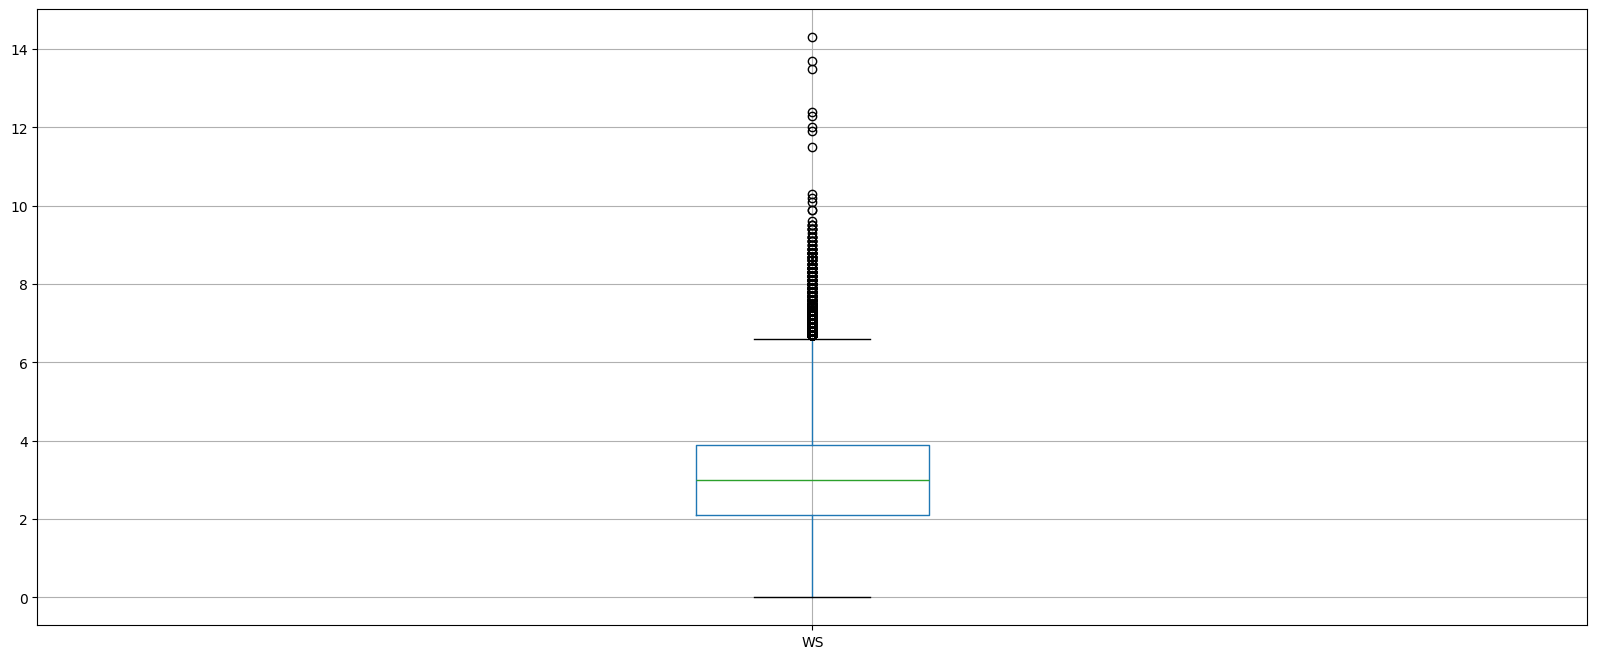

In [203]:
togo_df.boxplot('WS', figsize=(20, 8))
plt.show()

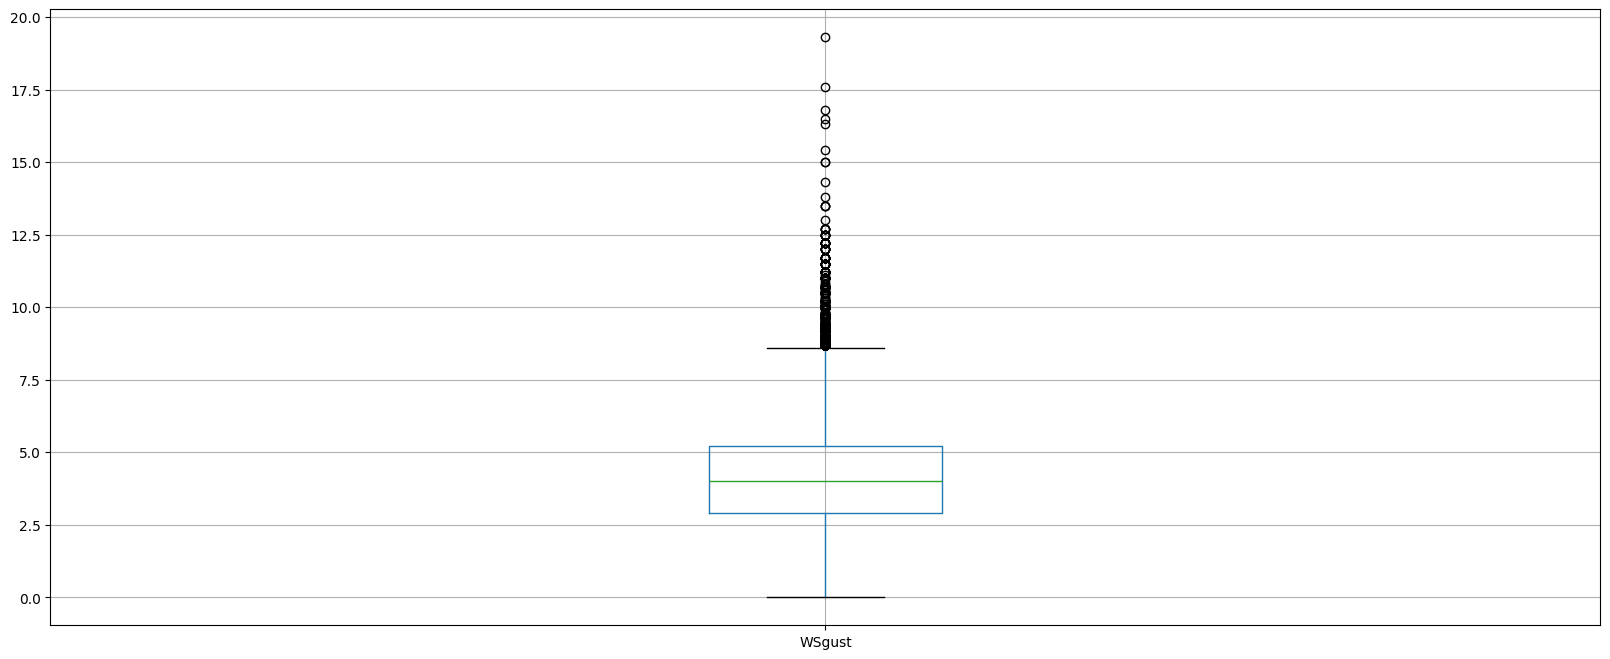

In [204]:
togo_df.boxplot('WSgust', figsize=(20, 8))
plt.show()

In [205]:
togo_df = remove_outliers_iqr(togo_df, 'WS')
togo_df = remove_outliers_iqr(togo_df, 'WSgust')

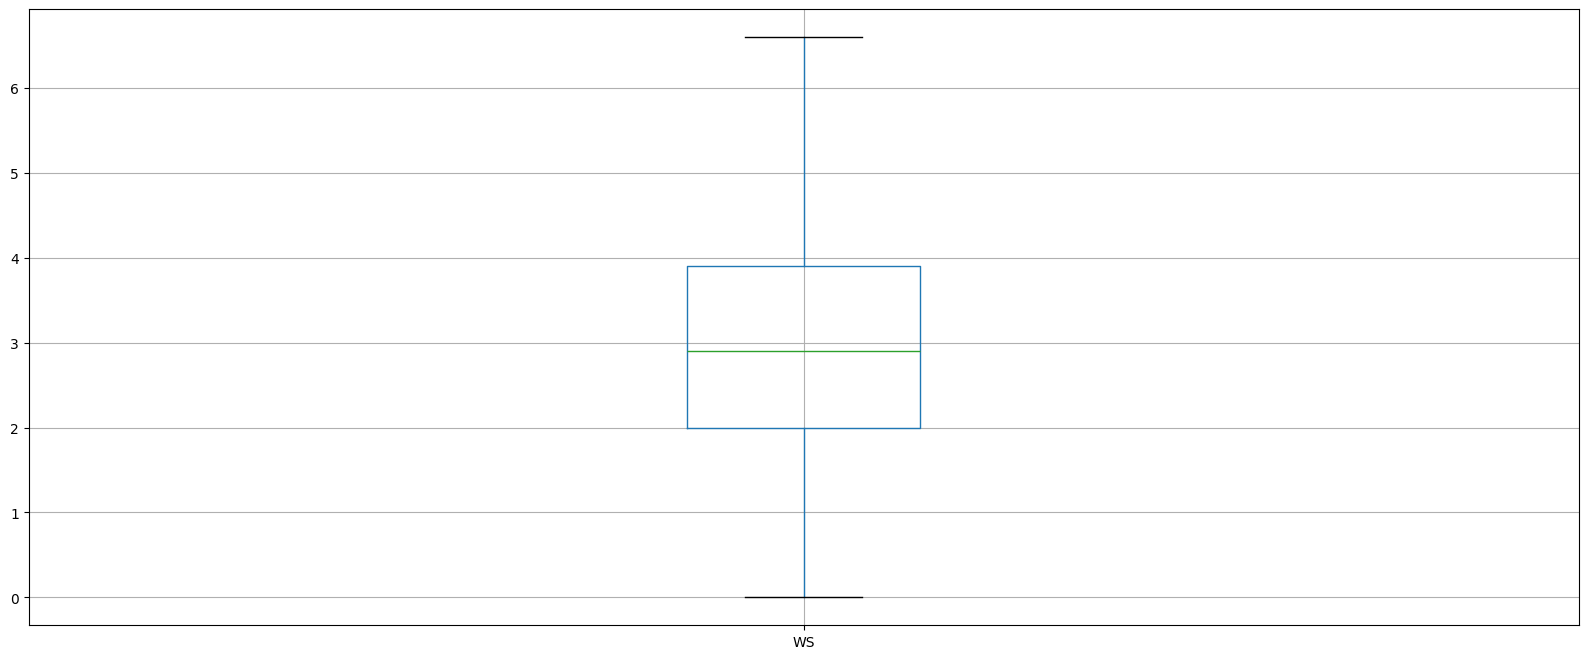

In [206]:
togo_df.boxplot('WS', figsize=(20, 8))
plt.show()

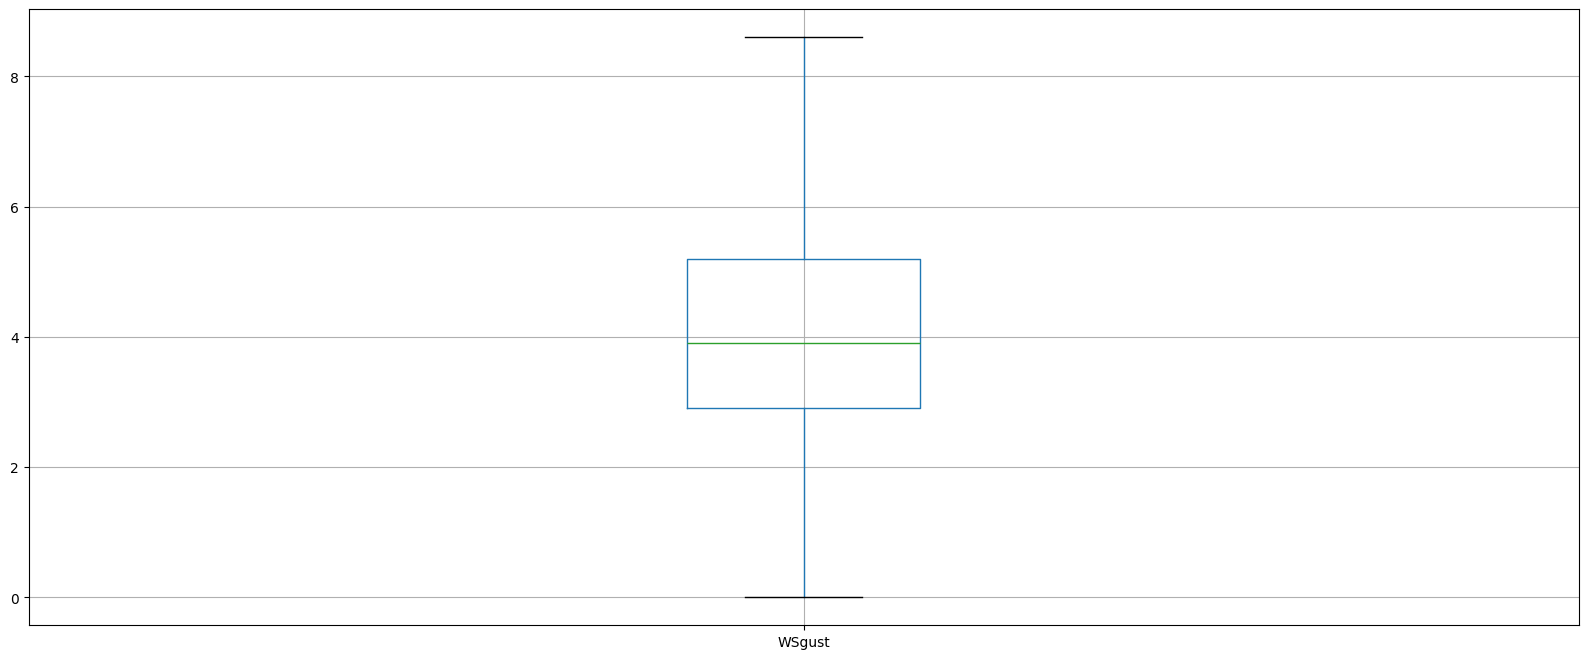

In [207]:
togo_df.boxplot('WSgust', figsize=(20, 8))
plt.show()

In [208]:
try:
    togo_df.to_csv('../data/clean/togo_clean.csv')
except Exception as e:
    print(f'Something went wrong while trying to save the file, {e}')

### Togo Dapaong QC - Time Series Analysis

In [209]:
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df['Timestamp'].dtype

dtype('<M8[ns]')

In [210]:
togo_df['Month'] = togo_df['Timestamp'].dt.month
togo_df['Month'].dtype

dtype('int32')

In [211]:
monthly_average_togo_df = togo_df.groupby('Month').mean()
monthly_average_togo_df.head(20)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
Month,,,,,,,,,,,,,,,,,,
1,2022-01-16 06:11:00.236182272,516.922858,474.891922,195.853567,543.289356,531.678231,28.465187,15.490839,4.014198,5.301208,0.769070,70.178097,13.317018,977.527312,0.000647,0.000000,36.236991,38.290520
2,2022-02-15 02:08:44.530104576,567.510681,378.480371,286.162808,581.283626,553.187364,31.849439,12.937736,3.299739,4.451961,0.702261,86.289597,13.512081,975.893524,0.001000,0.000000,41.318940,44.065252
3,2022-03-16 09:26:46.642857216,577.229275,265.294684,355.362593,560.533944,521.791139,35.352350,27.611542,2.589757,3.605192,0.631356,159.285010,14.371434,973.326346,0.002277,0.000000,48.587629,50.687790
4,2022-04-15 22:00:01.284605440,580.449628,340.379493,291.573631,534.592861,524.521509,33.498101,48.572492,3.265612,4.414206,0.692834,217.497177,14.702477,973.488579,0.002257,0.000000,47.768953,51.224966
5,2022-05-16 19:50:15.384697600,543.847149,307.537645,279.424731,475.975831,466.583975,32.150538,57.157691,3.151818,4.295181,0.692333,223.724115,14.752353,975.976174,0.001660,0.000016,45.603486,49.791433
6,2022-06-15 16:09:28.925876480,529.395777,308.078774,267.482869,460.830961,454.561381,29.795863,63.736066,2.955397,4.025812,0.662098,229.918453,14.074124,976.233342,0.000642,0.000016,42.367707,45.774878
7,2022-07-15 20:38:01.264826624,490.825972,246.650969,285.771245,433.173858,427.913482,28.141738,71.693376,3.343829,4.517358,0.712983,233.422378,13.861762,977.300470,0.001116,0.000211,39.458186,41.905866
8,2022-08-16 01:10:22.550412032,475.423938,229.032067,288.752727,435.490361,430.815618,27.269968,77.302315,3.033735,4.105847,0.664933,238.628079,13.038852,976.615282,0.001015,0.000342,39.065003,41.692796
9,2022-09-15 20:41:22.351630080,472.625982,250.201512,272.725829,452.134264,447.162065,27.467261,78.257495,2.295681,3.176999,0.566899,192.353337,12.513486,976.939886,0.001184,0.000139,40.003761,42.822047


#### Togo Dapaong QC - Bar Charts

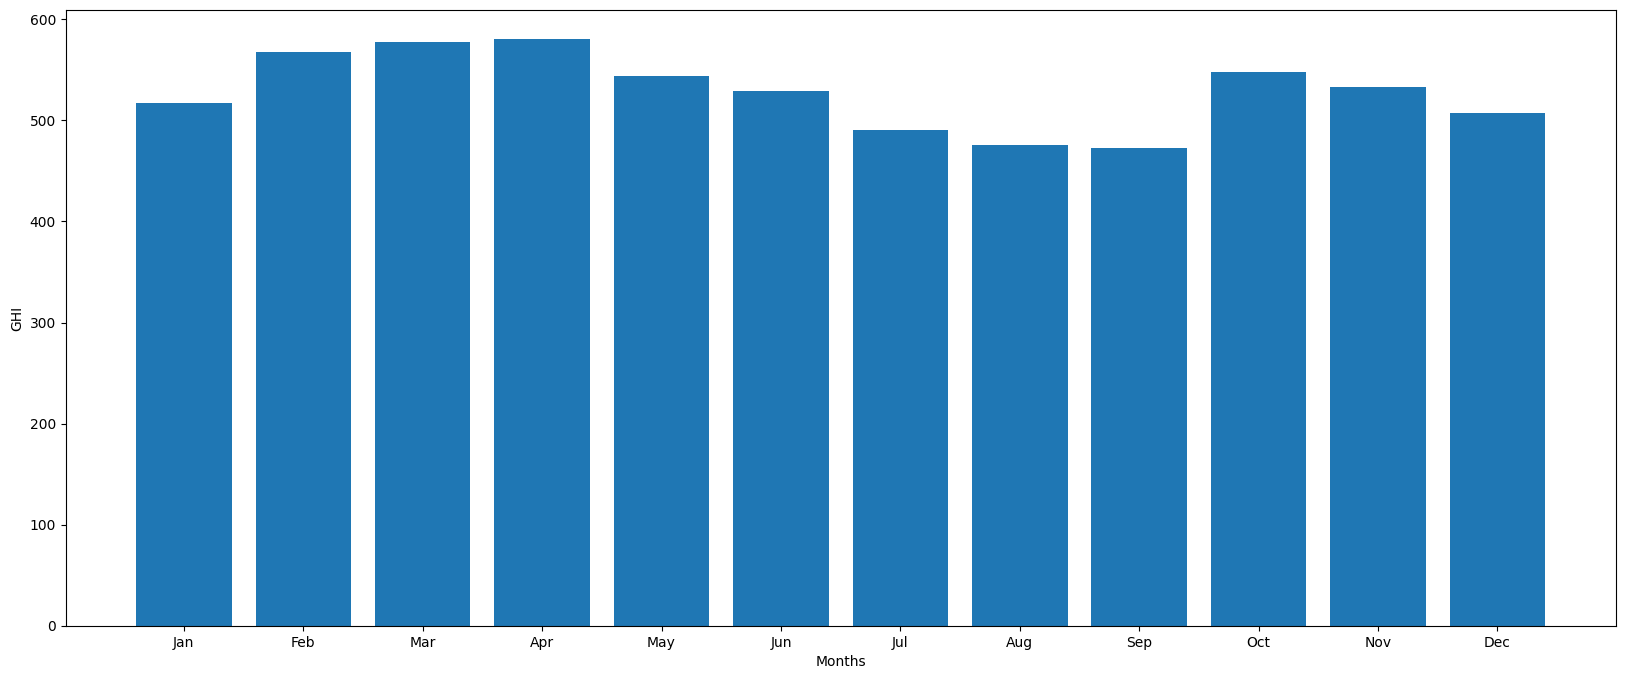

In [212]:
# plot bar charts for the numeric columns
# plot the columns -> GHI, DNI, DHI, and Tamb
plot_bar_chart(monthly_average_togo_df, 'GHI')

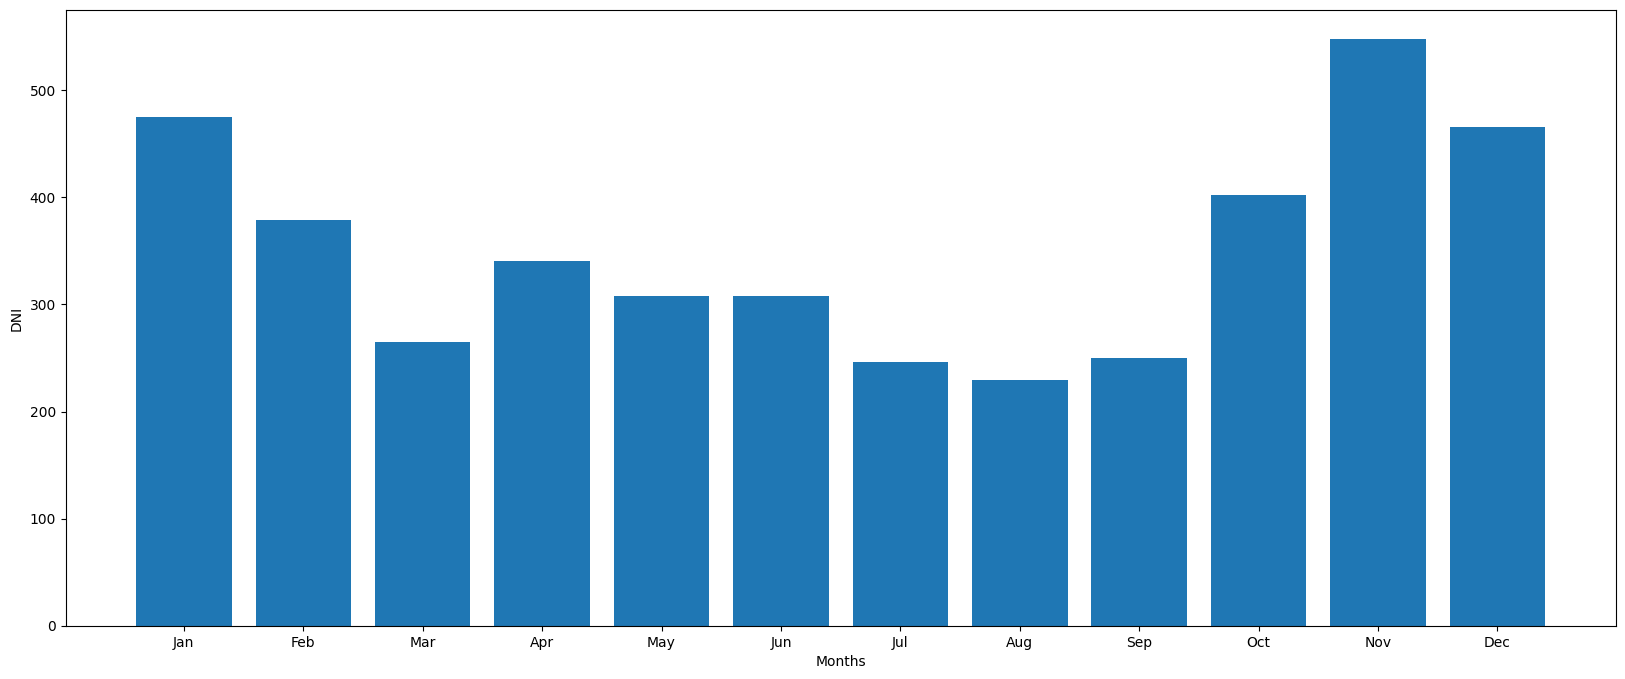

In [213]:
plot_bar_chart(monthly_average_togo_df, 'DNI')

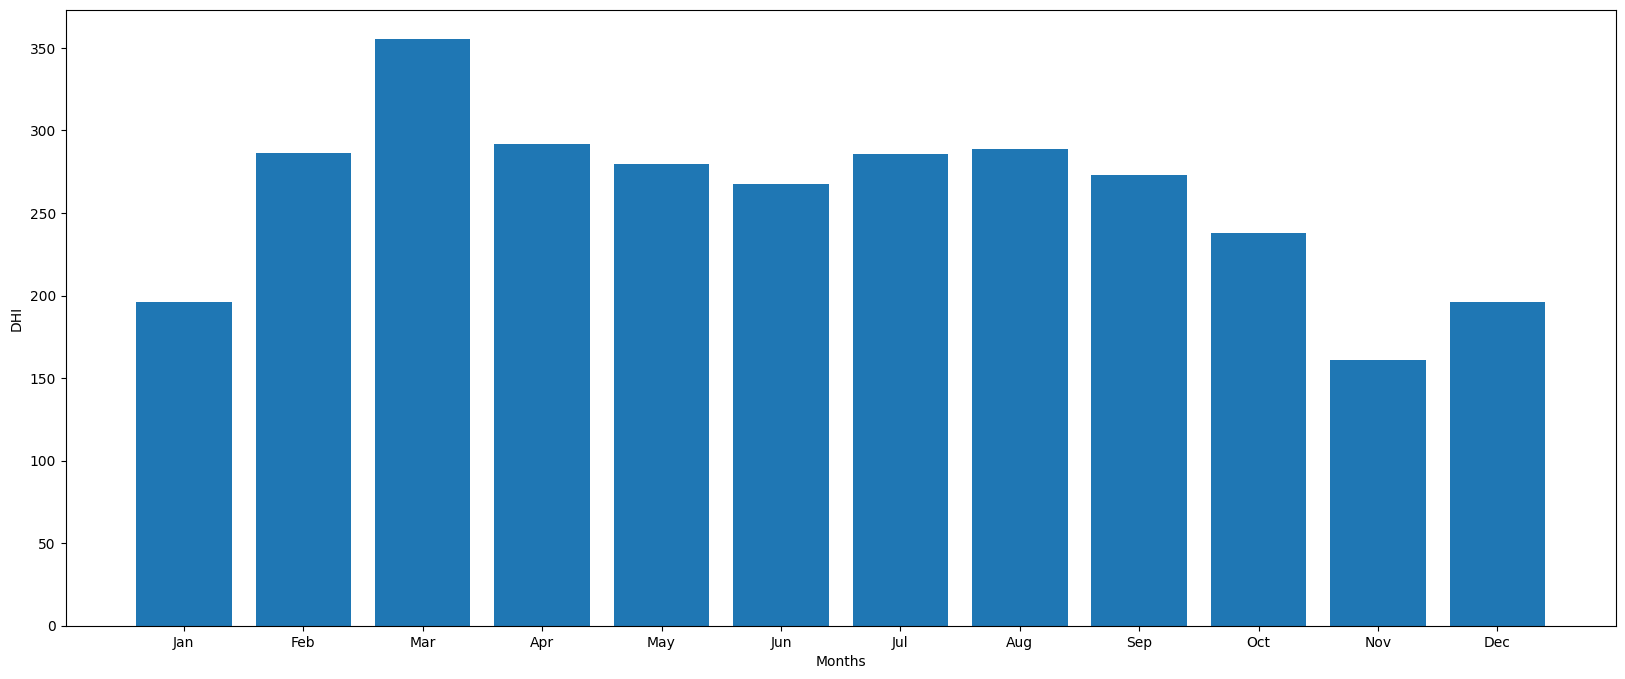

In [214]:
plot_bar_chart(monthly_average_togo_df, 'DHI')

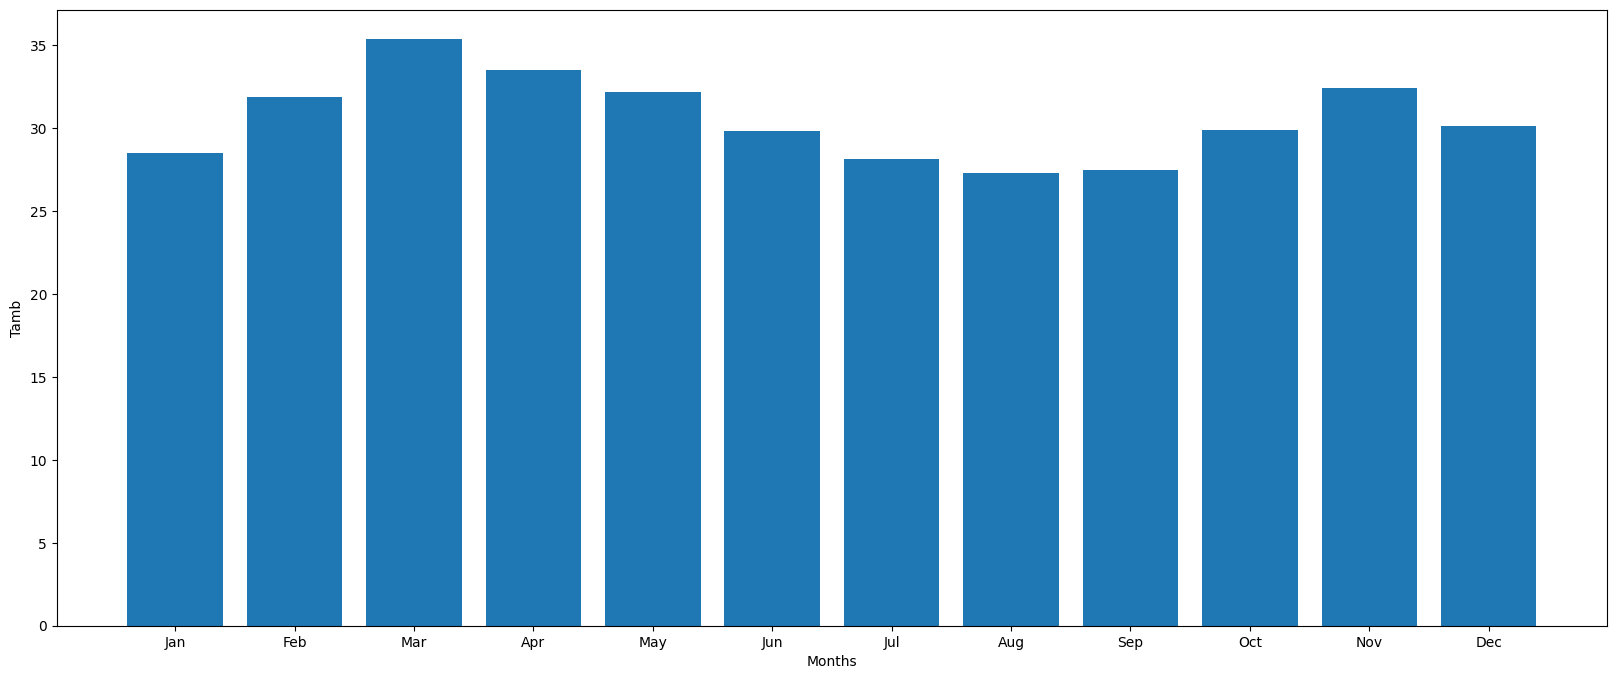

In [215]:
plot_bar_chart(monthly_average_togo_df, 'Tamb')

#### Togo Dapaong QC - Line Charts

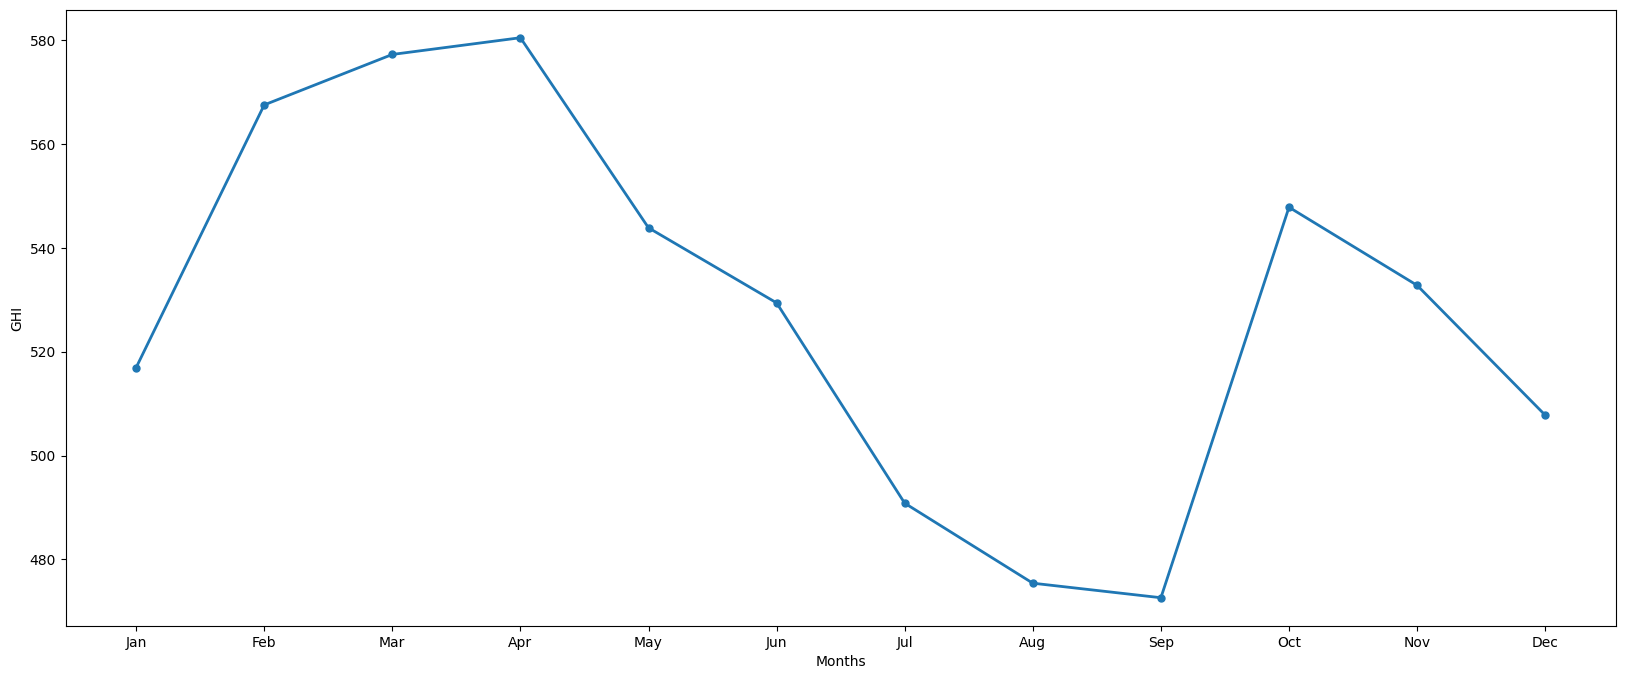

In [216]:
# plot the line charts numeric columns
# plot the columns -> GHI, DNI, DHI, and Tamb columns
plot_line_chart(monthly_average_togo_df, 'GHI')

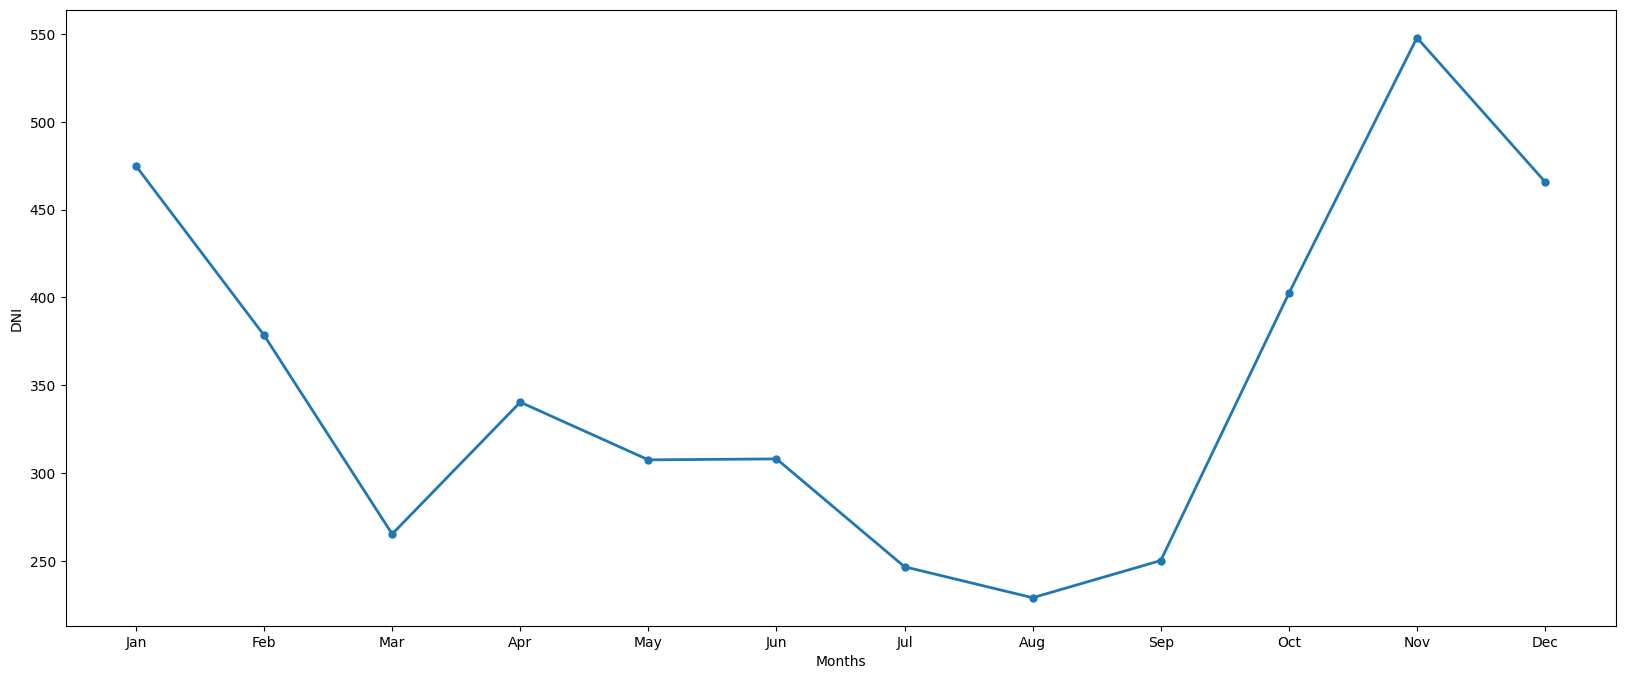

In [217]:
plot_line_chart(monthly_average_togo_df, 'DNI')

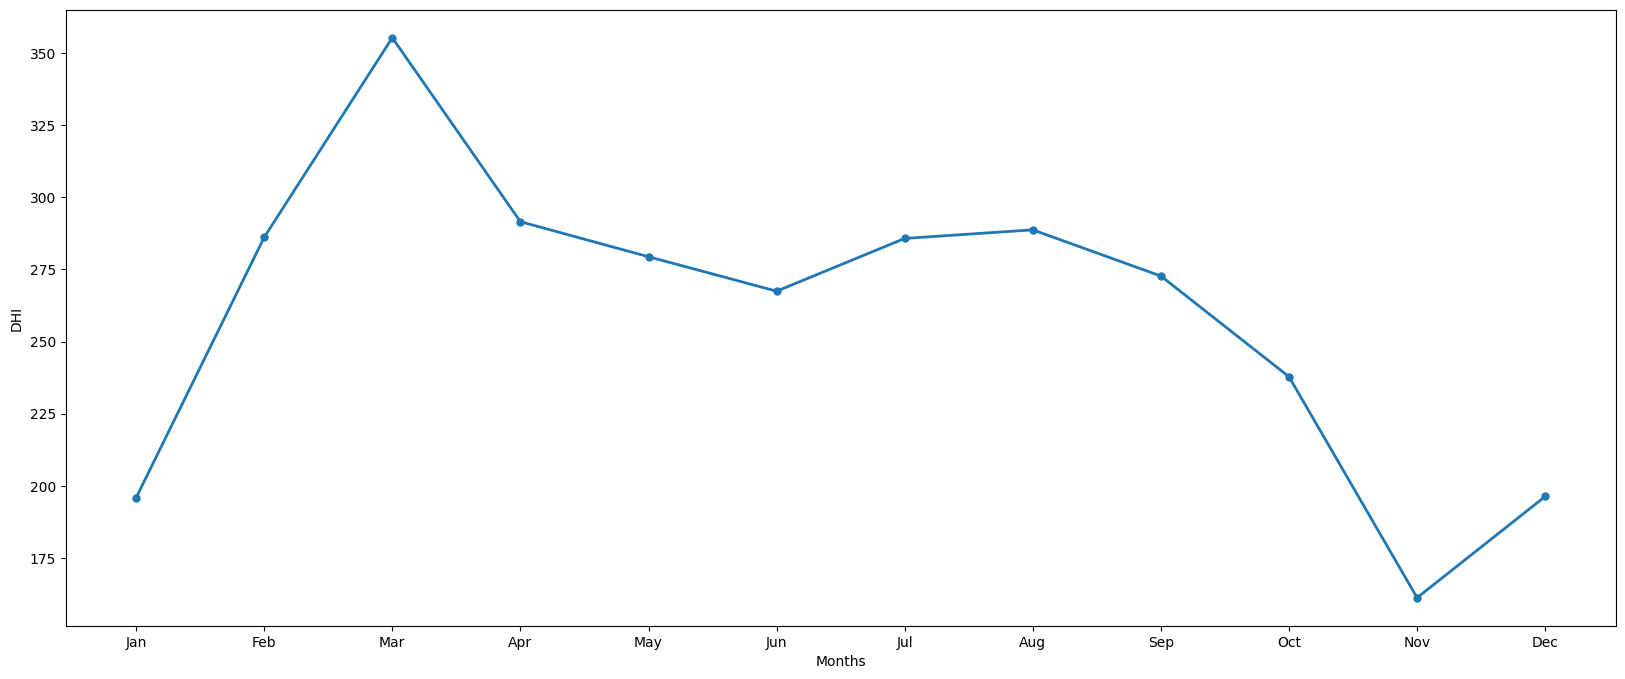

In [218]:
plot_line_chart(monthly_average_togo_df, 'DHI')

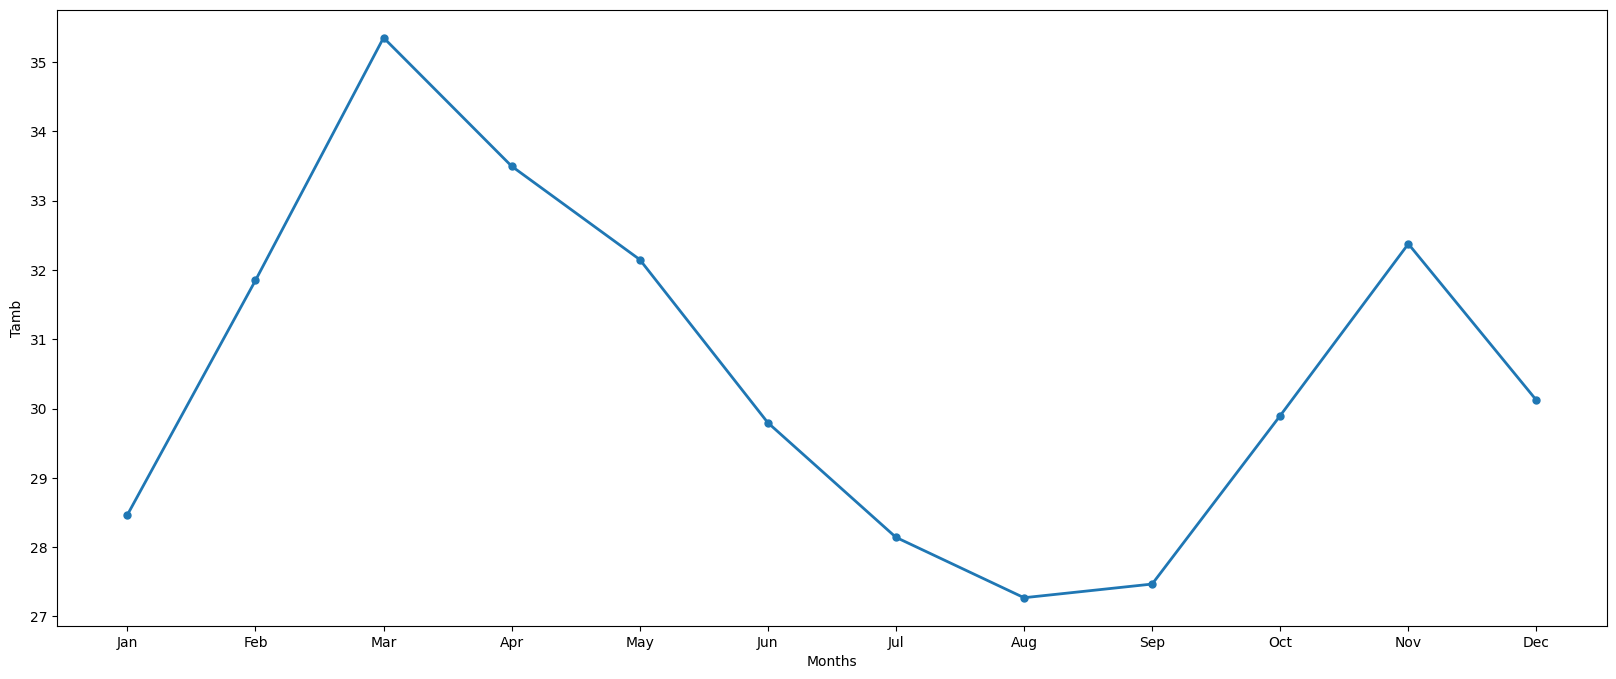

In [219]:
plot_line_chart(monthly_average_togo_df, 'Tamb')

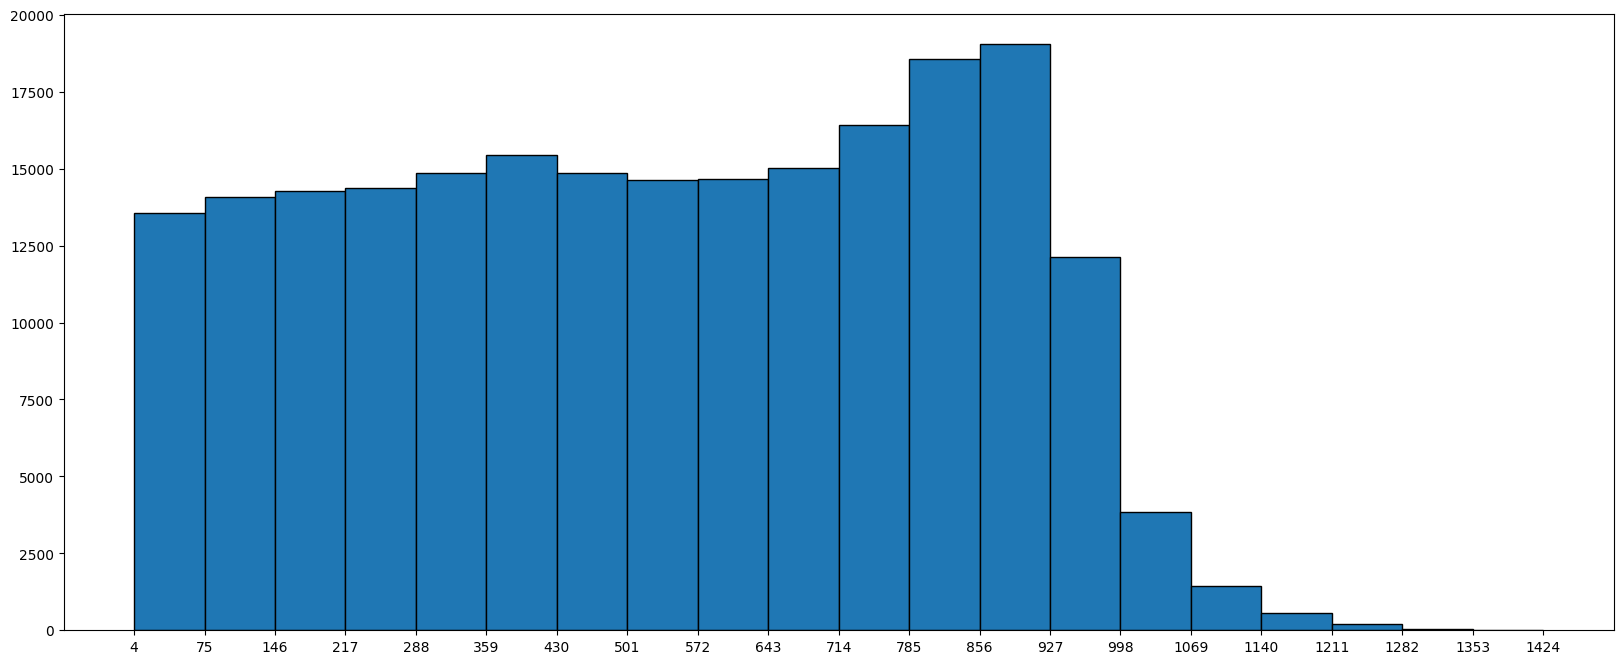

In [220]:
plot_histogram(togo_df, 20, 'GHI', 'Togo Dapaong QC GHI Histogram (Distribution)')

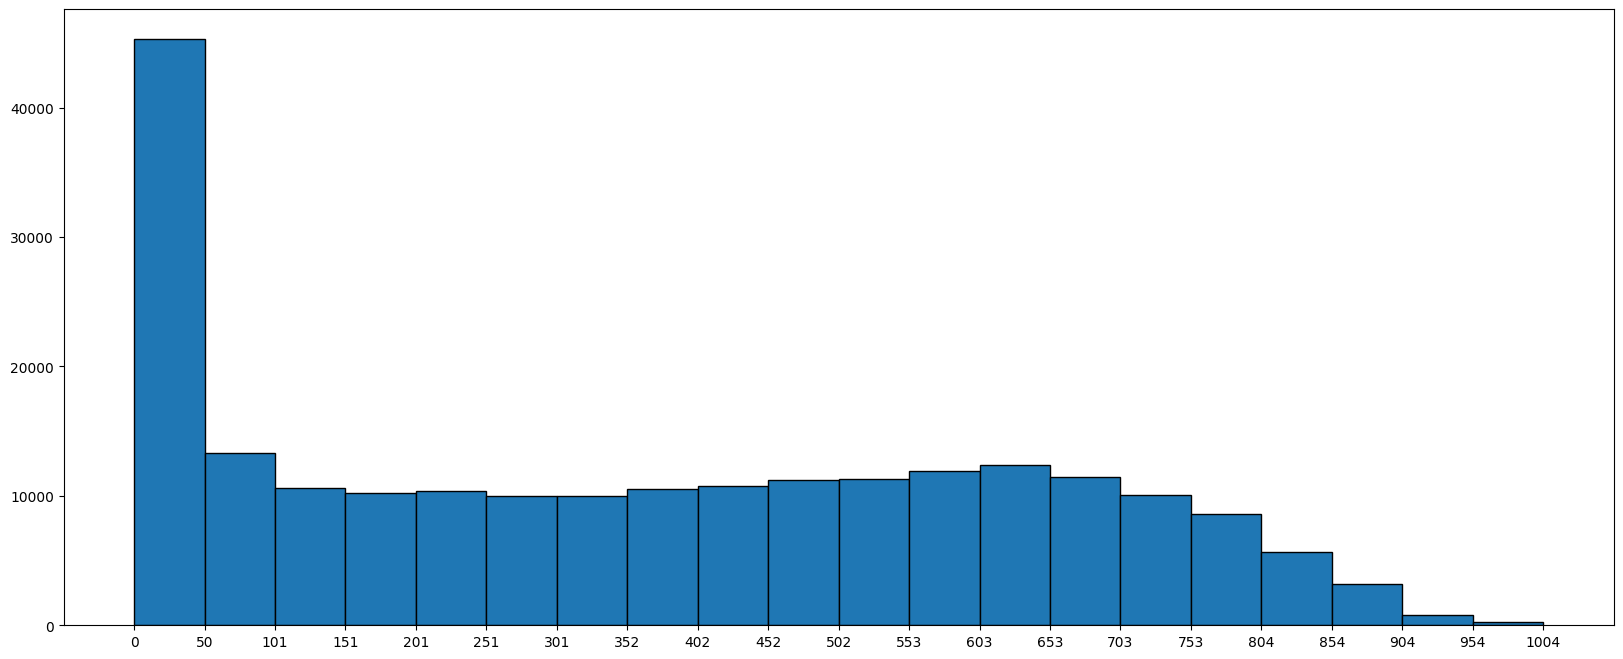

In [221]:
plot_histogram(togo_df, 20, 'DNI', 'Togo Dapaong QC DNI Histogram (Distribution)')

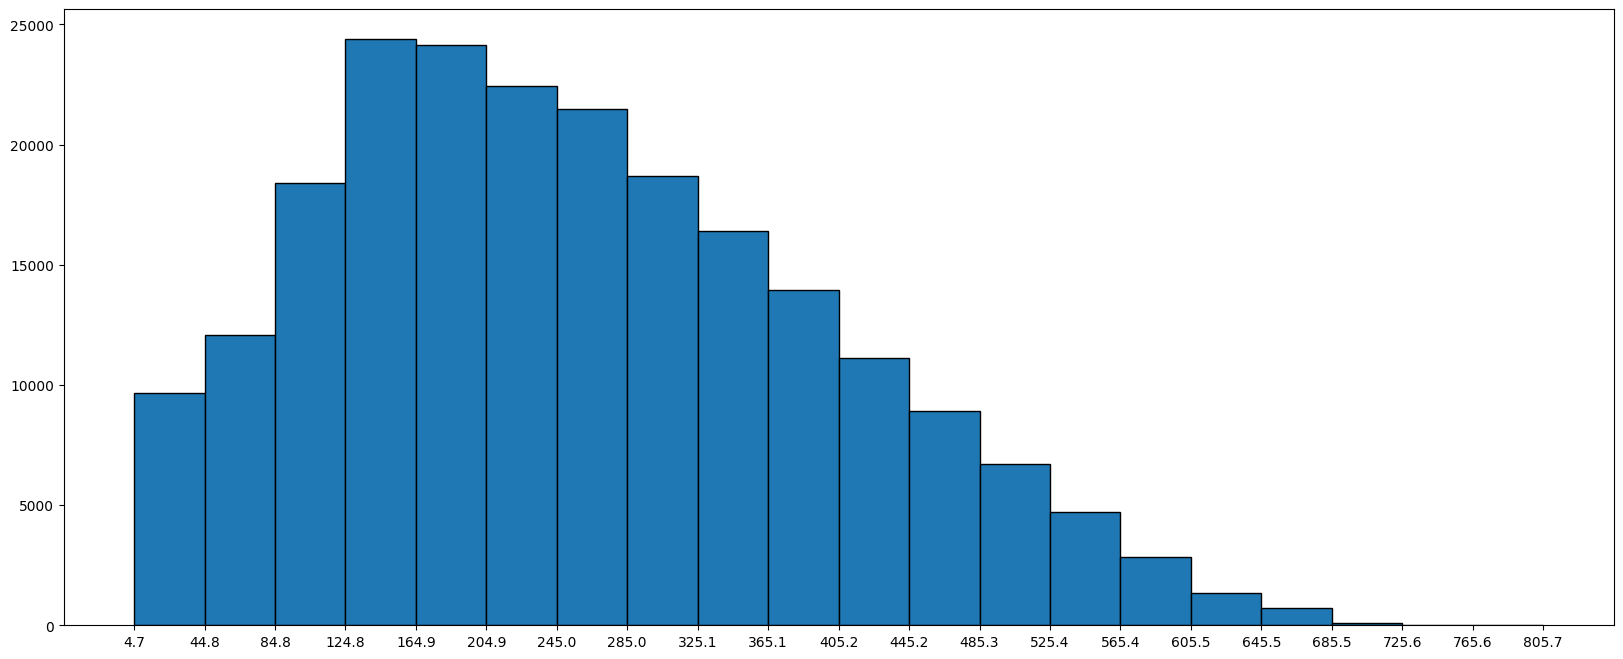

In [222]:
plot_histogram(togo_df, 20, 'DHI', 'Togo Dapaong QC DHI Histogram (Distribution)')

### Togo Dapaong QC - Correlation Analysis

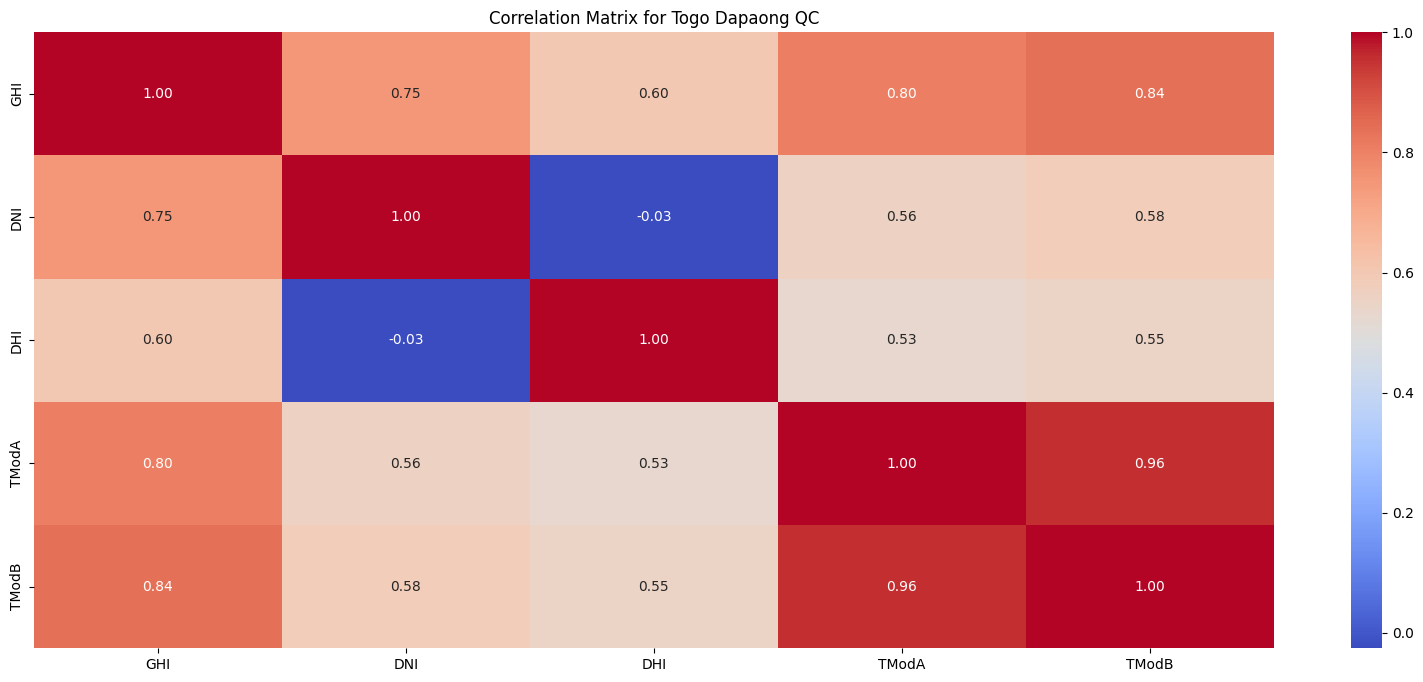

In [223]:
togo_corr = togo_df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
plot_heatmap(togo_corr, 'Correlation Matrix for Togo Dapaong QC')